<a href="https://colab.research.google.com/github/PhDSGilber/AMLA/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REQUIREMENTS AND LIBARIES**

In [1]:
#Requirements
!pip install -U pip
!pip install -U setuptools wheel
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


  Obtaining dependency information for autogluon from https://files.pythonhosted.org/packages/2e/42/f26592ecf3dc4e4edcbc5f7f7e3deba25b0681fad2ad04a82d12af17e3a4/autogluon-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.core[all]==0.8.2 from https://files.pythonhosted.org/packages/e0/56/545adb1d388e78591cd7e36de0c8b889c1944de362bdaeec0f31d01890df/autogluon.core-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.features==0.8.2 from https://files.pythonhosted.org/packages/bb/ea/7892719f78a30aee1bf42c4a0540fbae98bfbdf56b85fab79ffc437eb687/autogluon.features-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.tabular[all]==0.8.2 from https://files.pythonhosted.org/packages/f3/dc/0bd8cadb9a5e2f3e5b12caaa6745357d912ffc7b8b75fb4e426a38331028/autogluon.tabular-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.multimodal==0.8.2 from https://files.pythonhosted.org/packages/f

In [2]:
#Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from copy import deepcopy

from statsmodels.stats.outliers_influence import variance_inflation_factor

from autogluon.tabular import TabularDataset, TabularPredictor

import joblib

from scipy.cluster.hierarchy import dendrogram, linkage

from itertools import combinations

from yellowbrick.classifier import confusion_matrix as  cm
from yellowbrick.classifier import classification_report as cr
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import class_prediction_error
from yellowbrick.model_selection import FeatureImportances

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor#example
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor#exampe
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import HuberRegressor, BayesianRidge, RANSACRegressor, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
from sklearn.cluster import KMeans

# **THE BREAST CANCER WISCONSIN DATASET**

BCW dataset from the University of Wisconsin Hospital was used to evaluate the impact of k-means clustering using centroid initialization, distance measures, threshold, attribute variations, and split methods. The objective of clustering this dataset was to achieve higher accuracy in cancer diagnosis. The principal aim of this algorithm is to expound k centers, one for each cluster. These focuses were set logically to avoid distinctive results from a diverse area selection. Along these steps, the better decision is to place them, however, much as could be expected far from one another. Every point was fitting in the given information set and relates to the closest center. The feature of this dataset is computed from fine needle aspirate (FNA) of a breast mass [16]. A total 699 instances, each having nine input attributes (2–10) and one target attribute (11) which is either benign or malignant, are presented in Table 1.

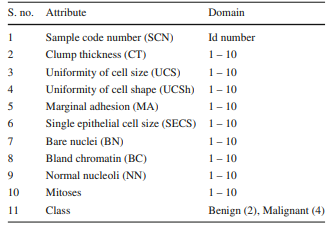

*   Clump thickness (CT): It indicates grouping of cancer cells in multilayer.
*   Uniformity of cell size (UCS): It indicates metastasis to
lymph nodes.
*   Uniformity of cell shapes (UCSh): It identifies cancerous
cells, which are of varying size.
*   Marginal adhesion (MA): It suggests loss of adhesion,
i.e., a sign of malignancy but the cancerous cells lose this
property. So this retention of adhesion is an indication of
malignancy.
*   Single epithelial cell size (SECS): If the SECS become
larger, it may be a malignant cell.
*   Bare nuclei (BN): Bare nuclei without cytoplasm coating
which are found in benign tumors.
*   Bland chromatin (BC): It usually found in benign cell.
*   Normal nucleoli (NN): It is generally very small in benign
cells.
*   Mitoses: It is the process in cell division by which nucleus
divides.


### Import and organize dataset

NOTE: YOU MUST ORGANIZE AND OR TARGET AT THE END OF THE MATRIX

In [3]:
!mkdir breast_cancer
%cd /content/breast_cancer
!wget https://archive.ics.uci.edu/static/public/15/breast+cancer+wisconsin+original.zip
!unzip 'breast+cancer+wisconsin+original.zip'
!rm 'breast+cancer+wisconsin+original.zip'

names_colum = [ 'SCN','CT','UCS', 'UCSh','MA','SECS','BN', 'BC', 'NN', 'Mitoses','Class']#eliminar columna
df_breast_cancer = pd.read_csv('/content/breast_cancer/breast-cancer-wisconsin.data',names=names_colum, header=None)
df_breast_cancer = df_breast_cancer.drop('SCN', axis=1)
df_breast_cancer

/content/breast_cancer
--2023-09-18 00:43:06--  https://archive.ics.uci.edu/static/public/15/breast+cancer+wisconsin+original.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘breast+cancer+wisconsin+original.zip’

breast+cancer+wisco     [ <=>                ]  84.51K  --.-KB/s    in 0.1s    

2023-09-18 00:43:07 (849 KB/s) - ‘breast+cancer+wisconsin+original.zip’ saved [86541]

Archive:  breast+cancer+wisconsin+original.zip
  inflating: Index                   
  inflating: breast-cancer-wisconsin.data  
  inflating: breast-cancer-wisconsin.names  
  inflating: unformatted-data        
  inflating: wdbc.data               
  inflating: wdbc.names              
  inflating: wpbc.data               
  inflating: wpbc.names              


CT  UCS  UCSh  MA  SECS  BN  BC  NN  Mitoses  Class
0     5    1     1   1     2   1   3   1        1      2
1     5    4     4   5     7  10   3   2        1      2
2     3    1     1   1     2   2   3   1        1      2
3     6    8     8   1     3   4   3   7        1      2
4     4    1     1   3     2   1   3   1        1      2
..   ..  ...   ...  ..   ...  ..  ..  ..      ...    ...
694   3    1     1   1     3   2   1   1        1      2
695   2    1     1   1     2   1   1   1        1      2
696   5   10    10   3     7   3   8  10        2      4
697   4    8     6   4     3   4  10   6        1      4
698   4    8     8   5     4   5  10   4        1      4

[699 rows x 10 columns]

In [22]:
general_analysis(df_breast_cancer,9)

---------------------------------------------------------------------
ANALISIS GENERAL


Número de clases 2


Nombre de las caracteristicas, conteo de cantidades, verificación de valores nulos, tipo de dato por cada caracteristica


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CT       699 non-null    int64 
 1   UCS      699 non-null    int64 
 2   UCSh     699 non-null    int64 
 3   MA       699 non-null    int64 
 4   SECS     699 non-null    int64 
 5   BN       699 non-null    object
 6   BC       699 non-null    int64 
 7   NN       699 non-null    int64 
 8   Mitoses  699 non-null    int64 
 9   Class    699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


Cantidad de filas duplicadas
236


Cantidad de valores NAN por caracteristica
CT         0
UCS        0
UCSh       0
MA         0
SECS       0
BN         0
BC  

In [77]:
df_breast_cancer = fill_in_missing_data_cancer(df_breast_cancer,9)

Nuevo dataset con fill_miss_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CT       699 non-null    int64
 1   UCS      699 non-null    int64
 2   UCSh     699 non-null    int64
 3   MA       699 non-null    int64
 4   SECS     699 non-null    int64
 5   BN       699 non-null    int64
 6   BC       699 non-null    int64
 7   NN       699 non-null    int64
 8   Mitoses  699 non-null    int64
 9   Class    699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB
None


---------------------------------------------------------------------
ANALISIS DE FRECUENCIA


frecuencia por clase: 


2    458
4    241
Name: Class, dtype: int64


Medida de tendencia central


               CT         UCS        UCSh          MA        SECS          BN  \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     4.417740    3.134478    3.207439    2.806867    3.216023    3.486409   
std      2.815741    3.051459    2.971913    2.855379    2.214300    3.621929   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    5.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

               BC          NN     Mitoses       Class  
count  699.000000 

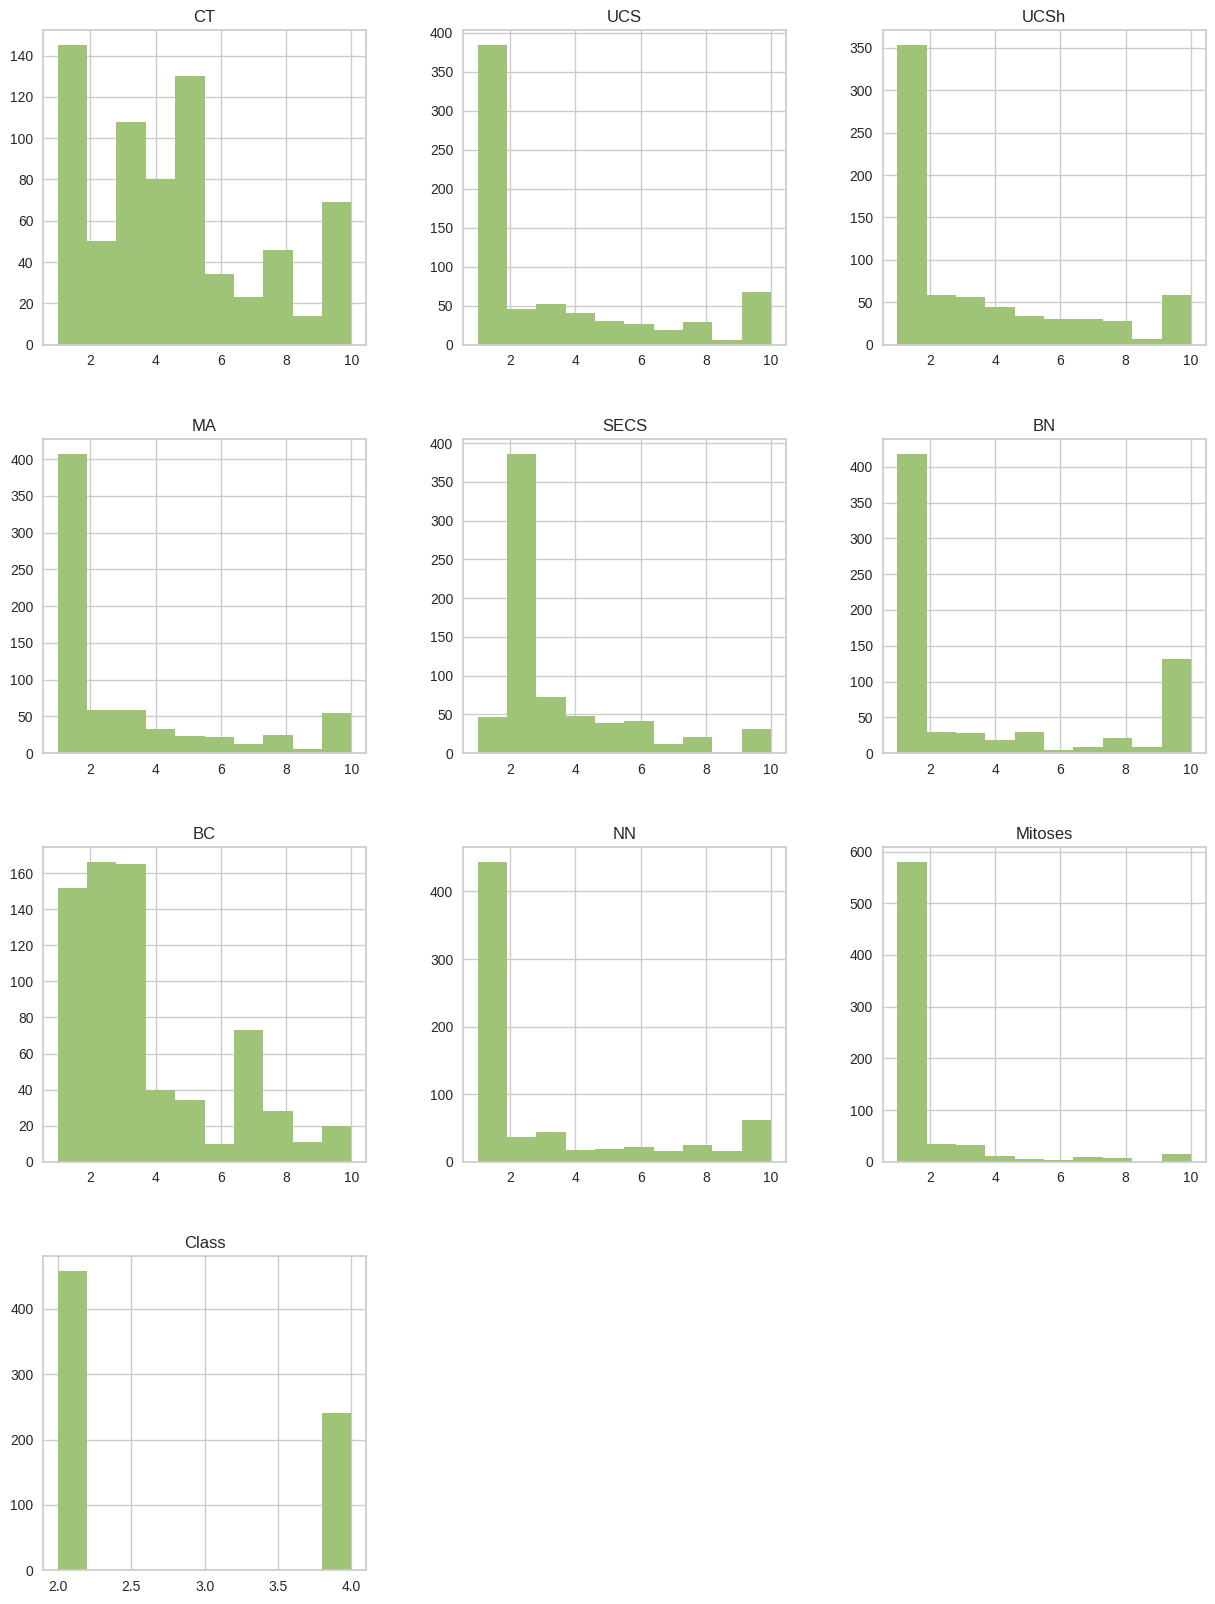



Diagrama de violin




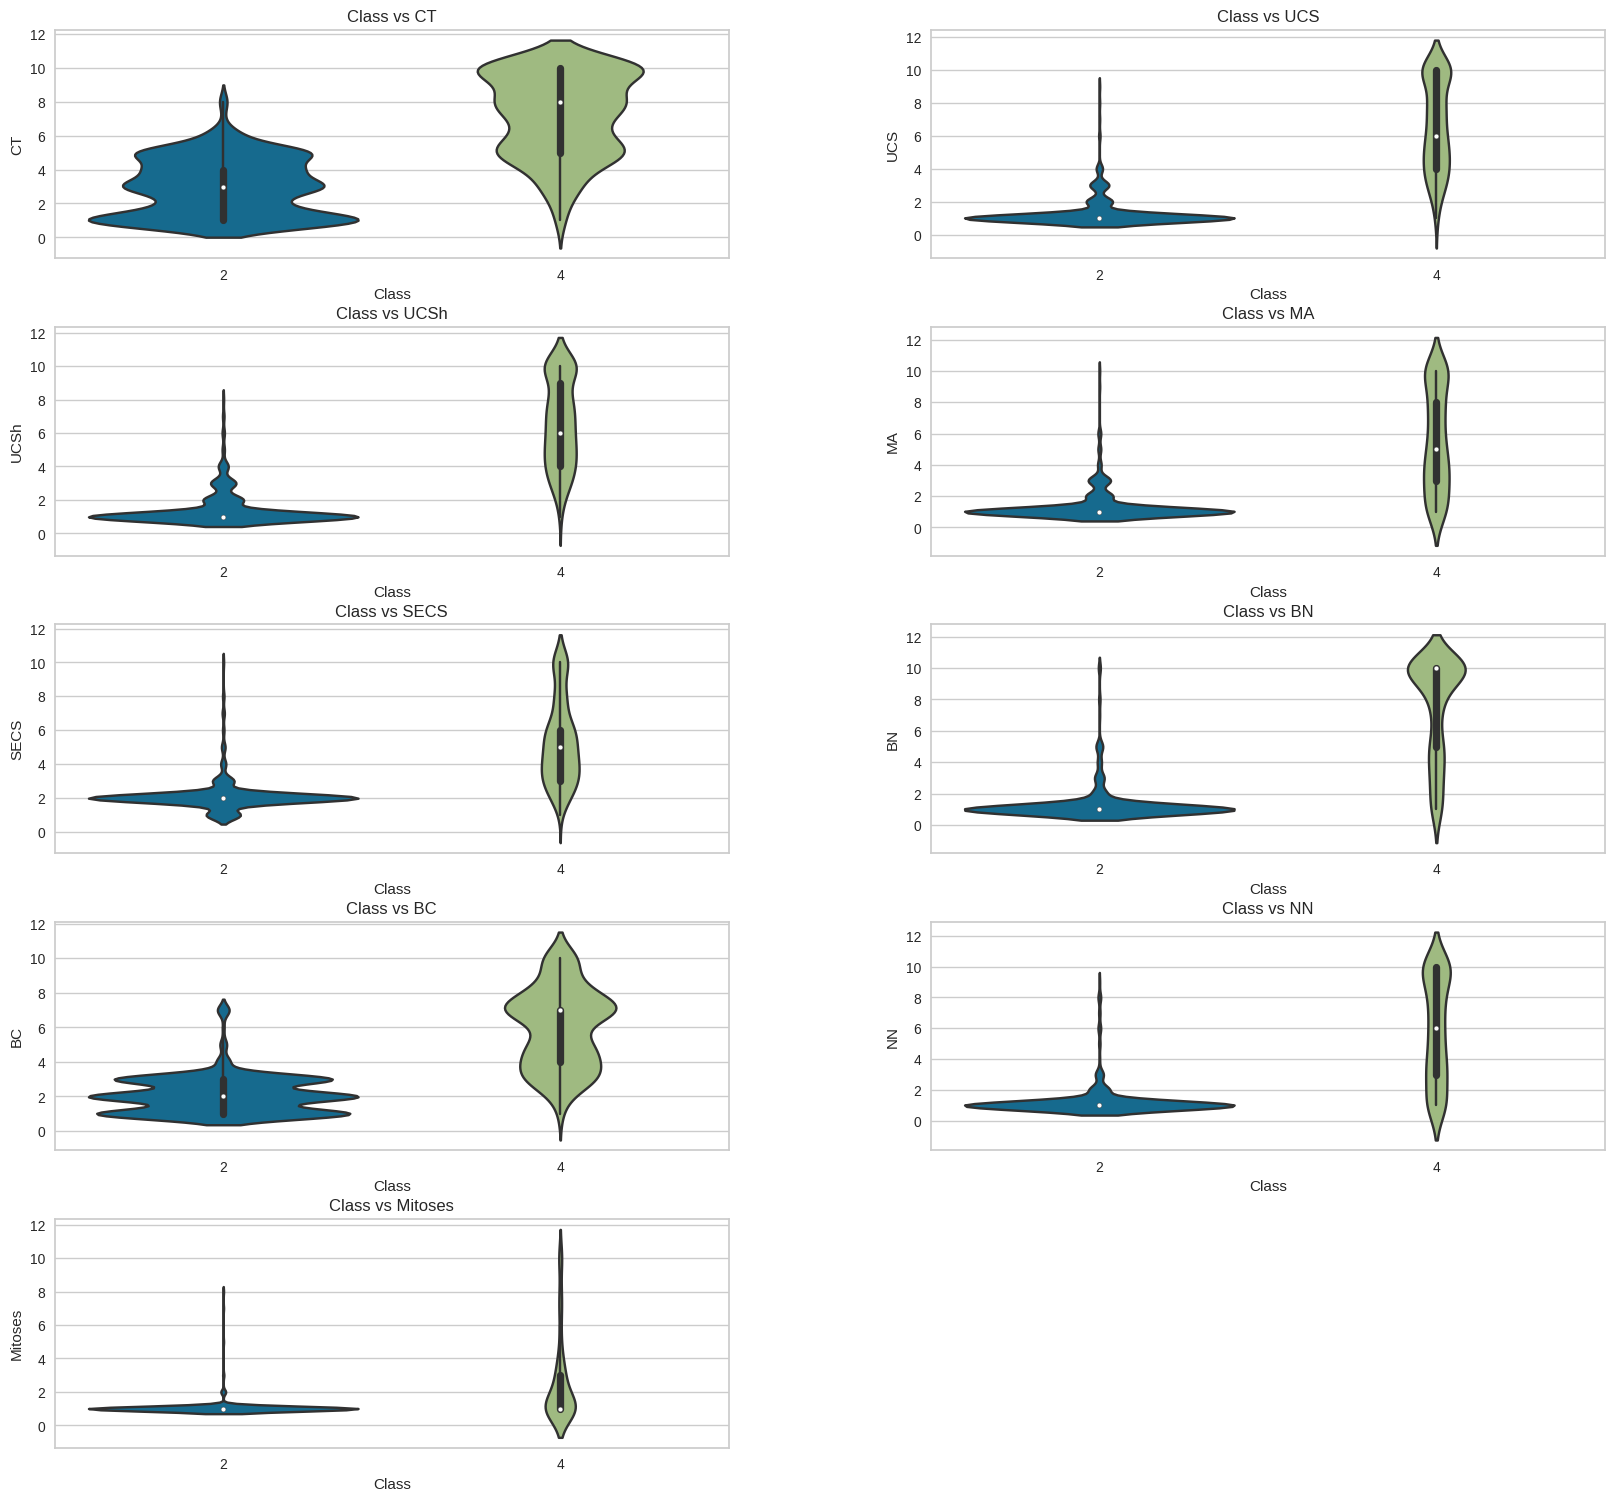







Diagrama de cajas




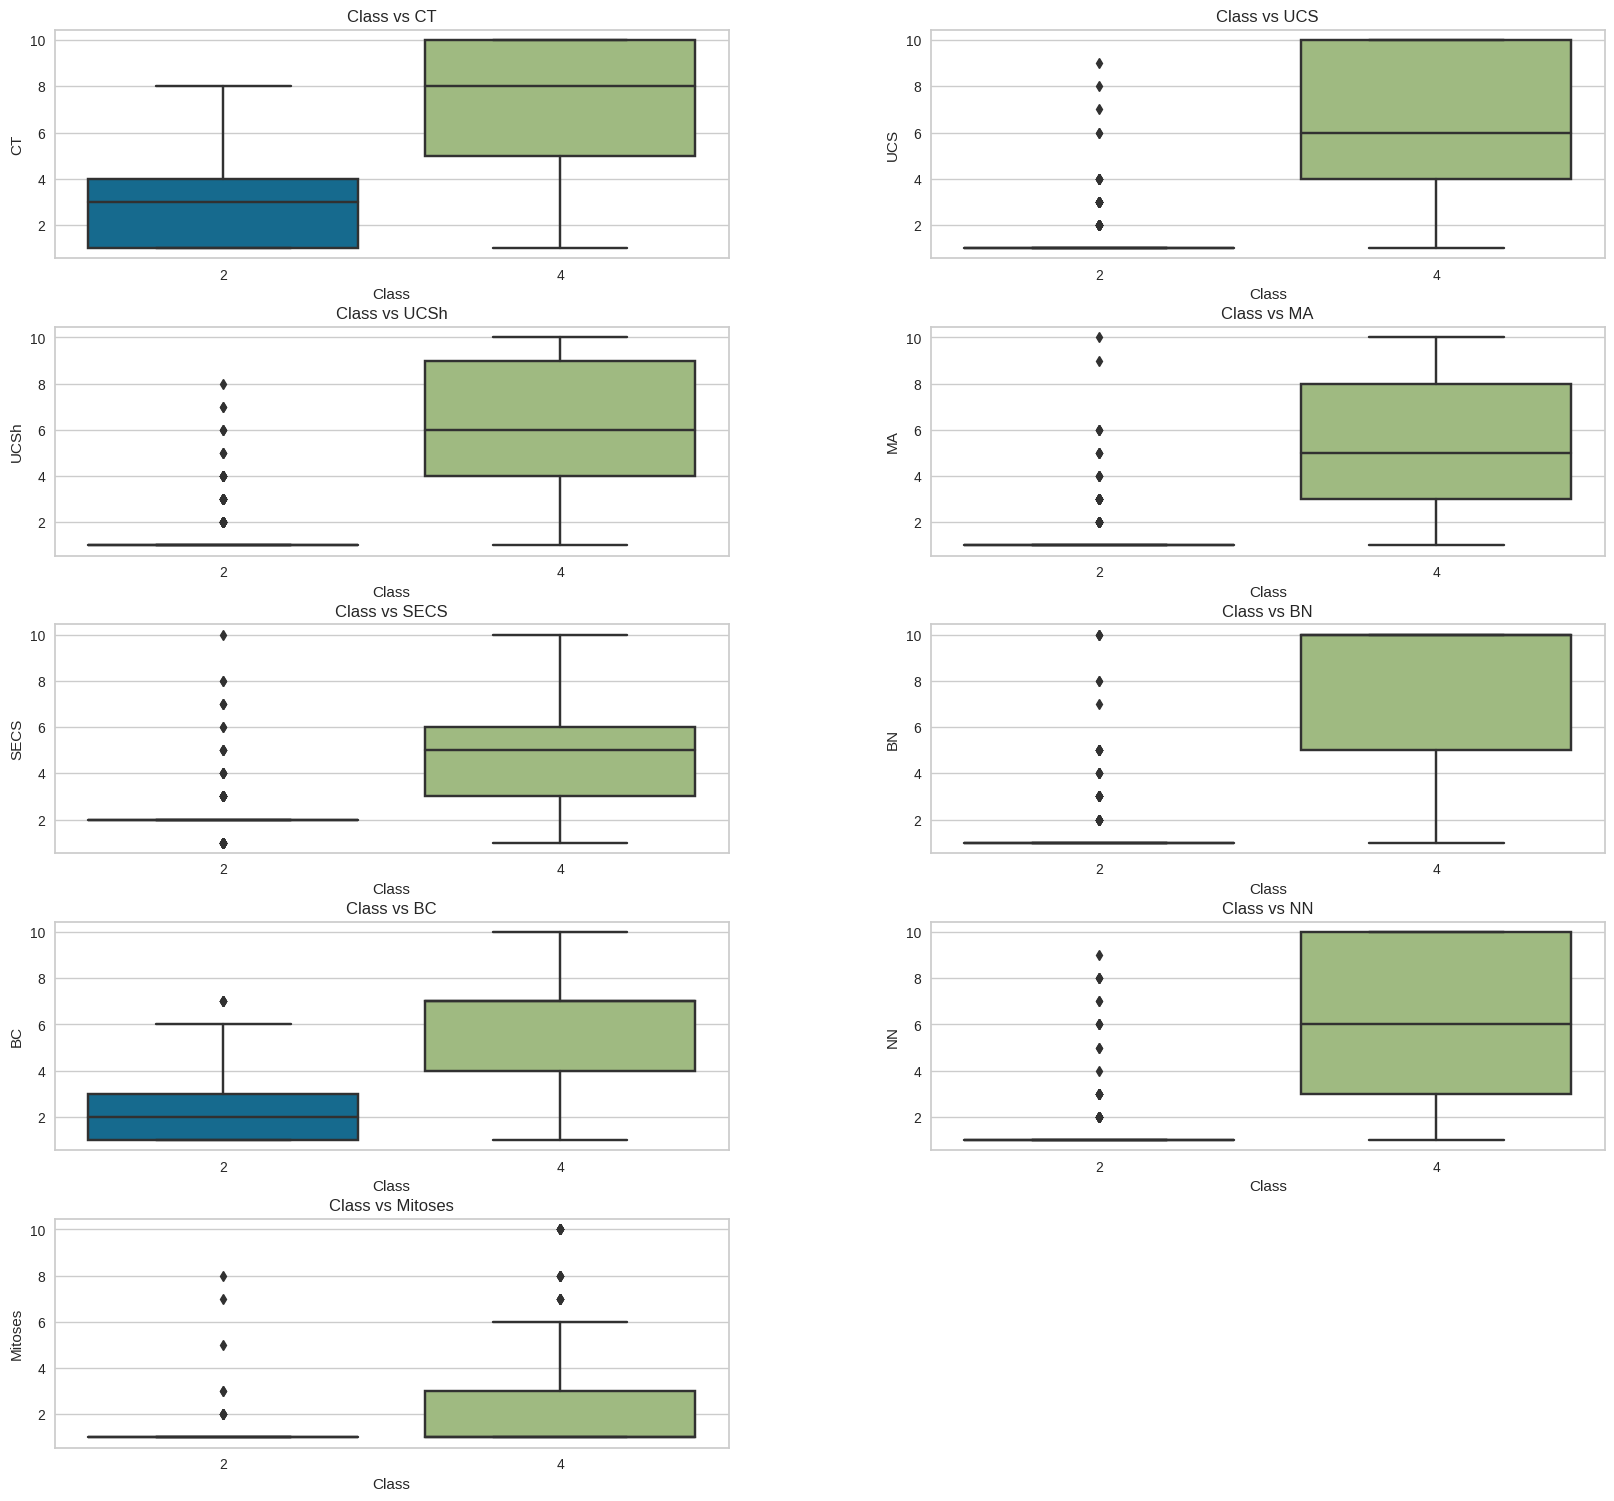

In [24]:
frequentist_analysis(df_breast_cancer,9)

---------------------------------------------------------------------
ANALISIS DE CORRELACIÓN


Coeficientes de correlación
               CT       UCS      UCSh        MA      SECS        BN        BC  \
CT       1.000000  0.644913  0.654589  0.486356  0.521816  0.590008  0.558428   
UCS      0.644913  1.000000  0.906882  0.705582  0.751799  0.686673  0.755721   
UCSh     0.654589  0.906882  1.000000  0.683079  0.719668  0.707474  0.735948   
MA       0.486356  0.705582  0.683079  1.000000  0.599599  0.666971  0.666715   
SECS     0.521816  0.751799  0.719668  0.599599  1.000000  0.583701  0.616102   
BN       0.590008  0.686673  0.707474  0.666971  0.583701  1.000000  0.674215   
BC       0.558428  0.755721  0.735948  0.666715  0.616102  0.674215  1.000000   
NN       0.535835  0.722865  0.719446  0.603352  0.628881  0.574778  0.665878   
Mitoses  0.350034  0.458693  0.438911  0.417633  0.479101  0.342397  0.344169   
Class    0.716001  0.817904  0.818934  0.696800  0.682785  0.81896

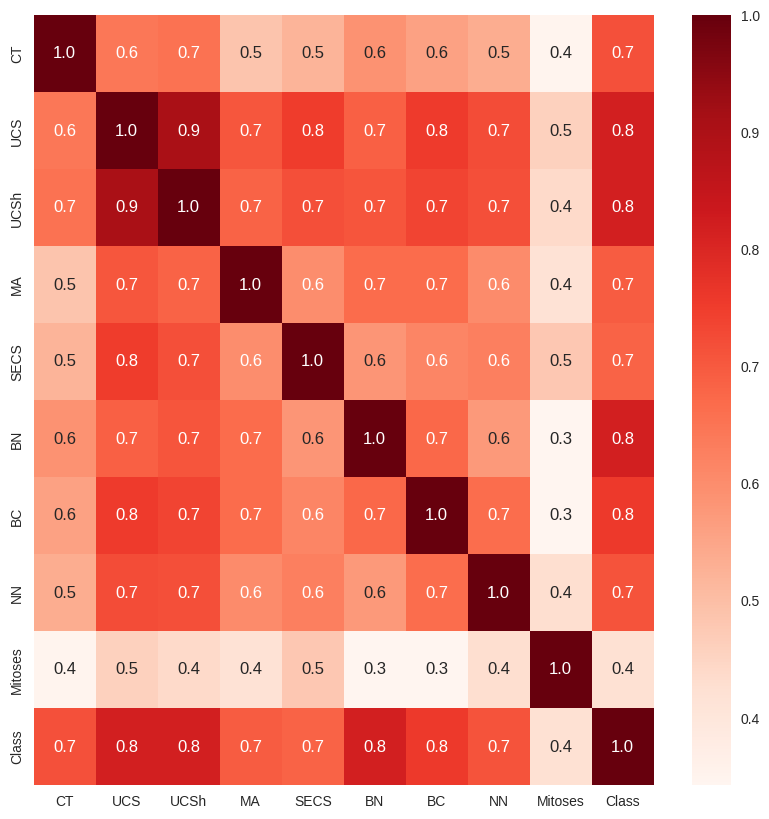



Grafico de correlación


Las caracteriticas a eliminar son ['UCSh', 'Class'] de acuerdo con el limite de 0.8 para los coeficientes de correlación


     CT  UCS  MA  SECS  BN  BC  NN  Mitoses
0     5    1   1     2   1   3   1        1
1     5    4   5     7  10   3   2        1
2     3    1   1     2   2   3   1        1
3     6    8   1     3   4   3   7        1
4     4    1   3     2   1   3   1        1
..   ..  ...  ..   ...  ..  ..  ..      ...
694   3    1   1     3   2   1   1        1
695   2    1   1     2   1   1   1        1
696   5   10   3     7   3   8  10        2
697   4    8   4     3   4  10   6        1
698   4    8   5     4   5  10   4        1

[699 rows x 8 columns]
Coeficiente VIF:


   feature       VIF
0       CT  5.106167
1      UCS  8.093042
2       MA  4.835889
3     SECS  6.797644
4       BN  4.667551
5       BC  7.496312
6       NN  4.451392
7  Mitoses  2.547188


No existen caracteriticas con con un coeficiente de correlación que supere el limite de 

In [78]:
df_breast_cancer_vif_corre = correlation_analysis(df_breast_cancer,9,'Si',0.8,'Si',10)

In [79]:
list_colum = df_breast_cancer.columns.values
list_colum_new_data = df_breast_cancer_vif_corre.columns.values
new_target_colum_number = np.where(list_colum_new_data == list_colum[8])[0][0] +1 #revisar paso de 9 a 8
X_train, X_test, y_train, y_test = split_data(df_breast_cancer_vif_corre,new_target_colum_number,0.2,'C')

----------------------------------------------------------------
PARTICIÒN DE DATASET


Para X train tenemos 559 instancias y 8 caracteristicas


Para X test tenemos 140 instancias y 8 caracteristicas


Para Y train tenemos 559 instancias


Para Y test tenemos 140 instancias




In [80]:
X_train,X_test = norm_data(X_train, X_test, y_train, y_test,'standar')

----------------------------------------------------------------
NORMALZIACIÒN DE DATASET


Se utilizo una normalizacion tipo standar


-----------------------------------------------------------
Importancia de caracteristicas por Clasificador extra de arboles




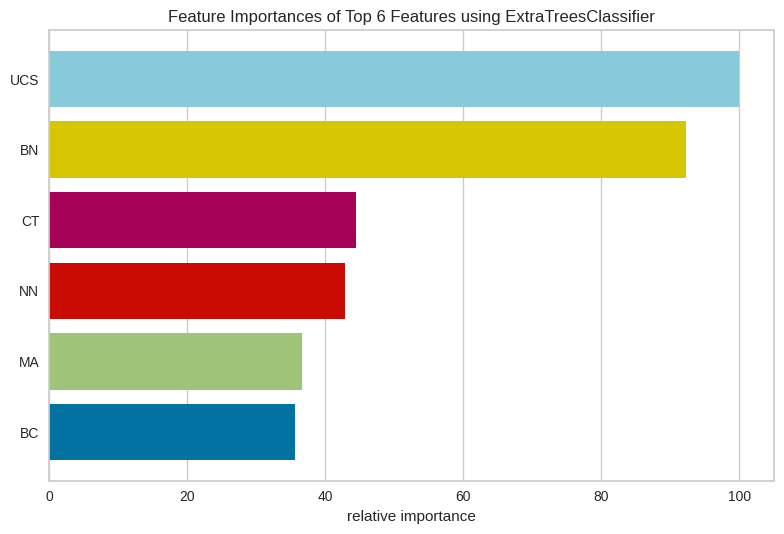



  features  feature_importance
0       CT            0.113559
1      UCS            0.255606
2       MA            0.093758
3     SECS            0.071195
4       BN            0.235712
5       BC            0.090990
6       NN            0.109592
7  Mitoses            0.029586


In [28]:
feature_aport_extree(df_breast_cancer_vif_corre[df_breast_cancer_vif_corre.columns.values[0:8]],X_train, y_train)

------------------------------------------------------------
ANALISIS DE COMPONENTES PRINCIPALES


PCA sin indicar numero de componentes
['CT' 'UCS' 'MA' 'SECS' 'BN' 'BC' 'NN' 'Mitoses']
   CT  UCS  MA  SECS  BN  BC  NN  Mitoses
0   5    1   1     2   1   3   1        1
1   5    4   5     7  10   3   2        1
2   3    1   1     2   2   3   1        1
3   6    8   1     3   4   3   7        1
4   4    1   3     2   1   3   1        1




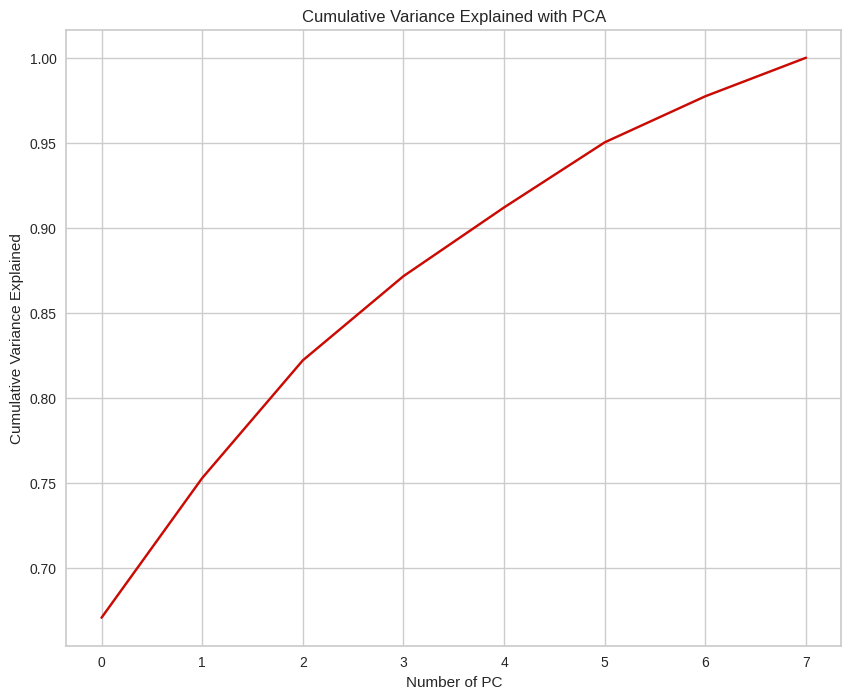



Impacto de las caracteriticas por PCA


           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
CT    2.085298 -0.154374 -1.789907  0.341786 -0.416506 -0.210529 -0.029394   
UCS   2.771075  0.498520 -0.057461  0.363024  0.375901  0.643802 -0.257180   
MA    2.339038 -0.091087  0.970348  0.937154 -0.799768 -0.402629 -0.211987   
SECS  1.736756  0.454913  0.070398  0.334715  0.881569  0.148718 -0.411965   
BN    3.109072 -1.695222  0.232468 -0.604754  0.338105 -0.199696 -0.033635   

           PC8  
CT    0.129794  
UCS  -0.791841  
MA    0.085345  
SECS  0.770629  
BN   -0.056292  




Analisis del impacto de las caracteirticas según la primera componente del PCA


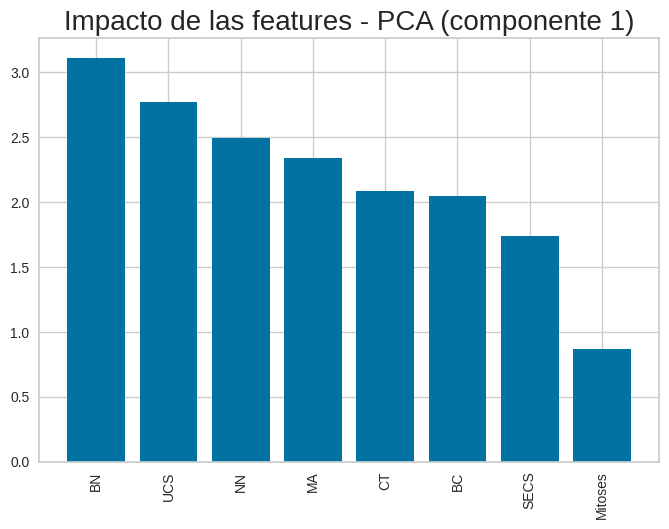





PCA para la cantidad de compontes (4) de acuerdo a lo ingresado
       PCA1      PCA2      PCA3      PCA4
0 -3.862387  0.037691 -1.790972  0.410363
1  4.977273 -4.682875  1.254844  0.378233
2 -4.027507 -0.578636  0.054550 -0.327159
3  3.527553  2.747611 -2.078172 -2.649004
4 -3.459081  0.025332  0.015009  1.287678




Gráfico de comparación entre las componentes principales


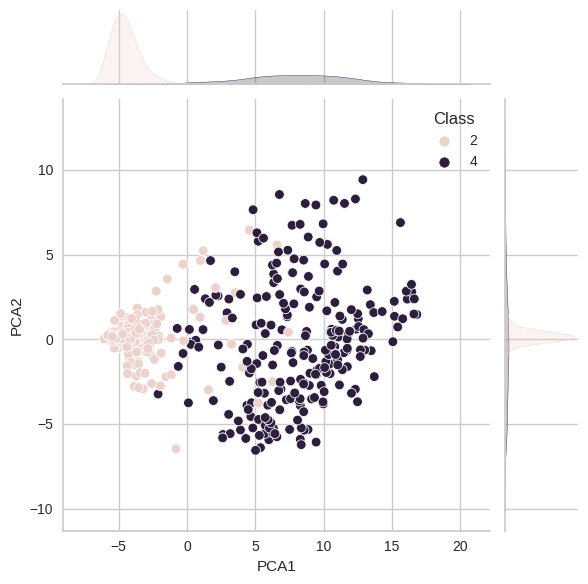

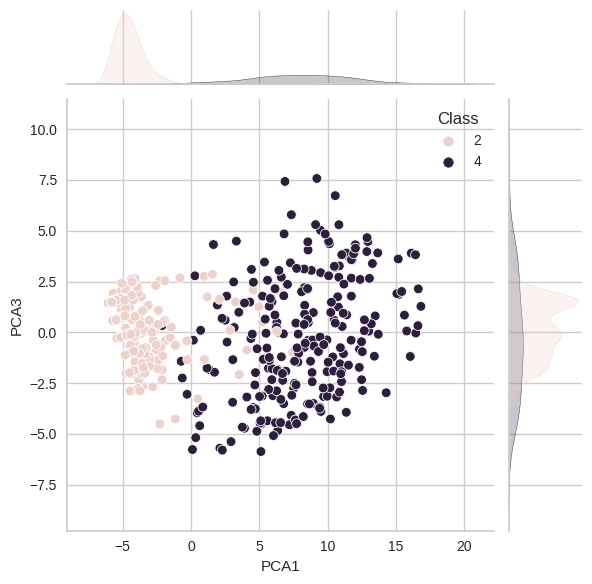

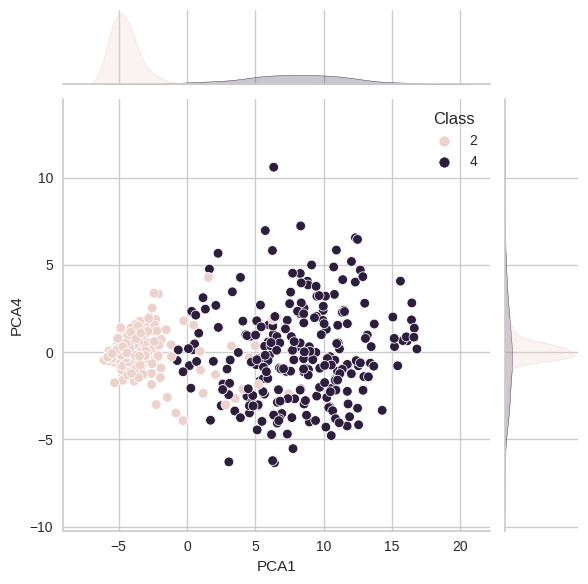

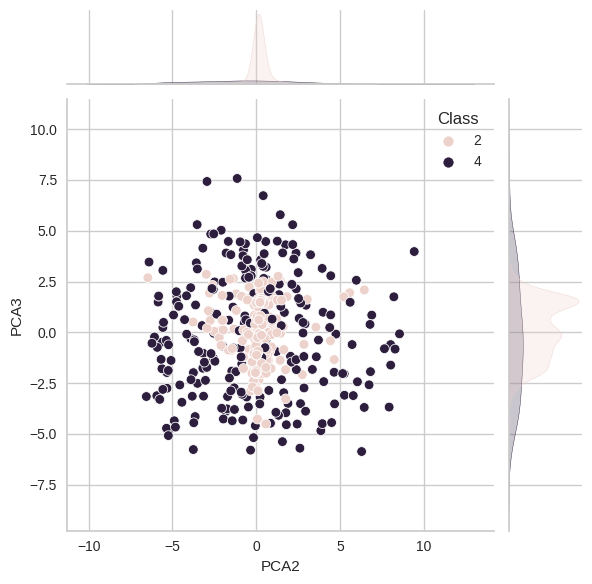

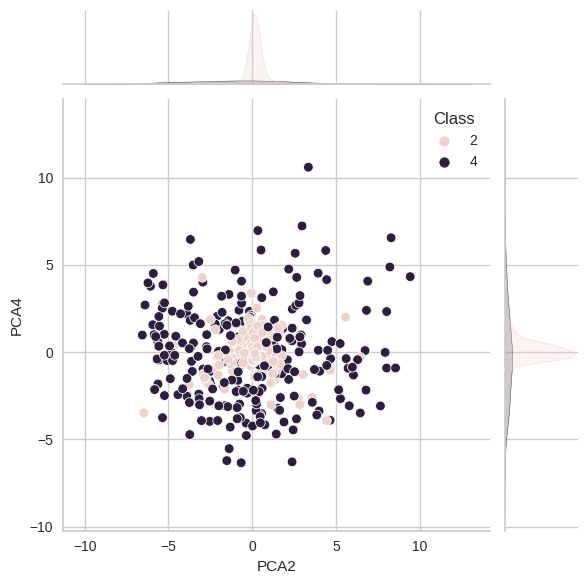

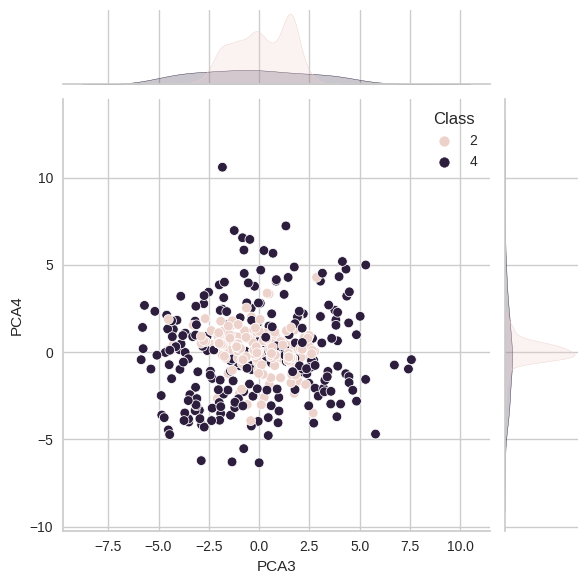



------------------------------------------------------------


Metodo del codo
[37488.59720908067, 12352.988887172249, 9700.325551662594, 8076.19373163823, 7130.604428977151, 6465.621419183288, 5844.331642837907, 5315.404809408896, 4949.10498090731]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

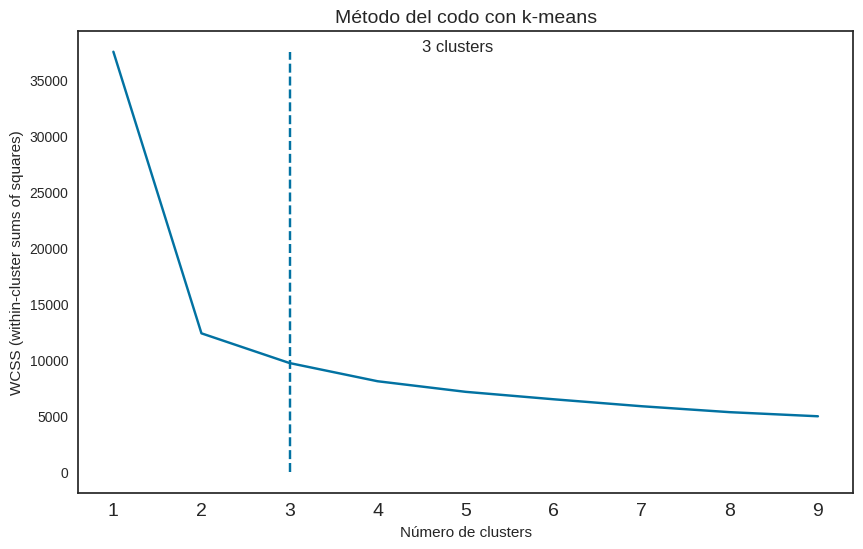





Gráfico de comparación entre las componentes principales y los grupos generados por KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


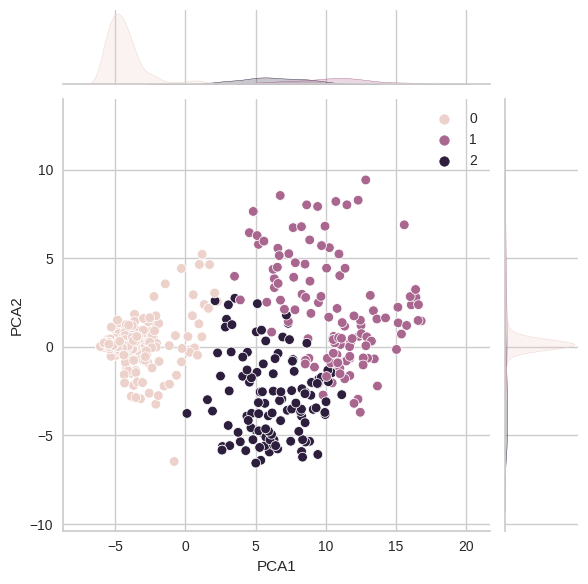

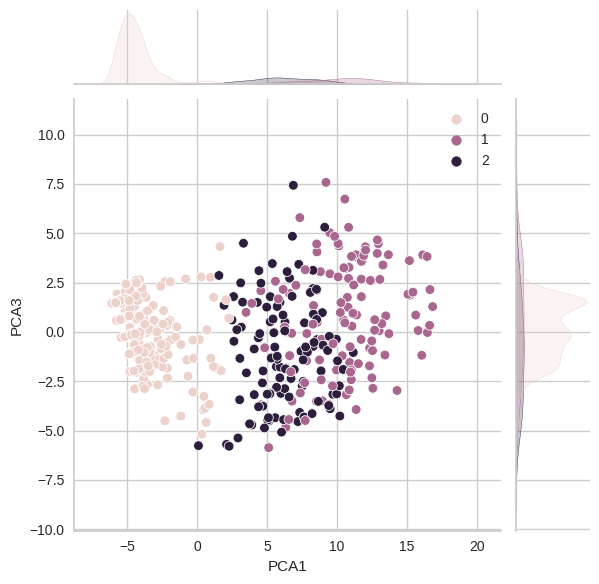

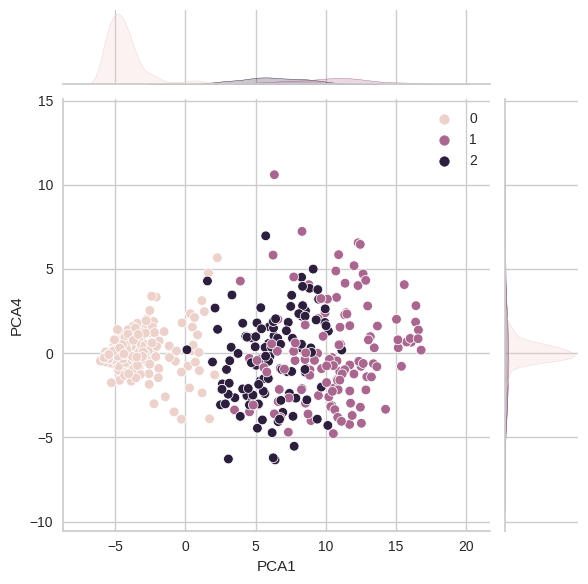

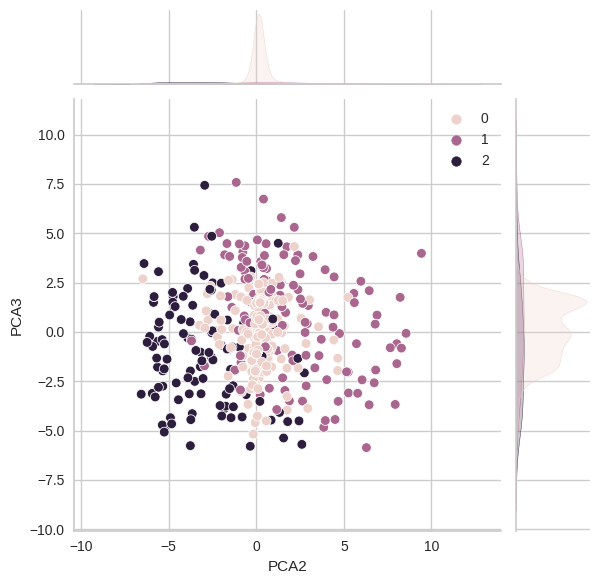

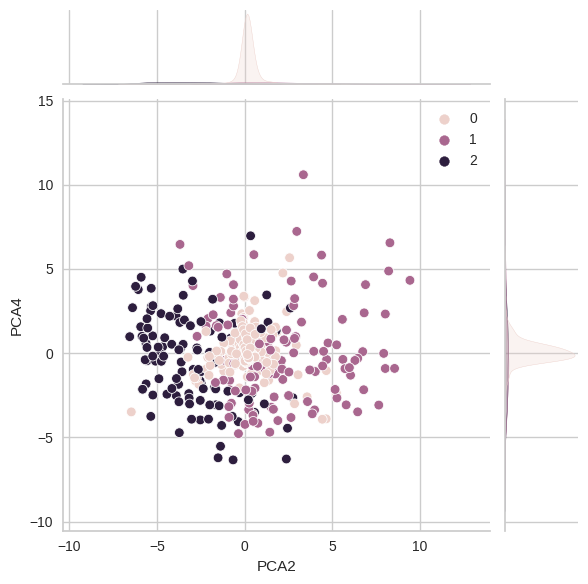

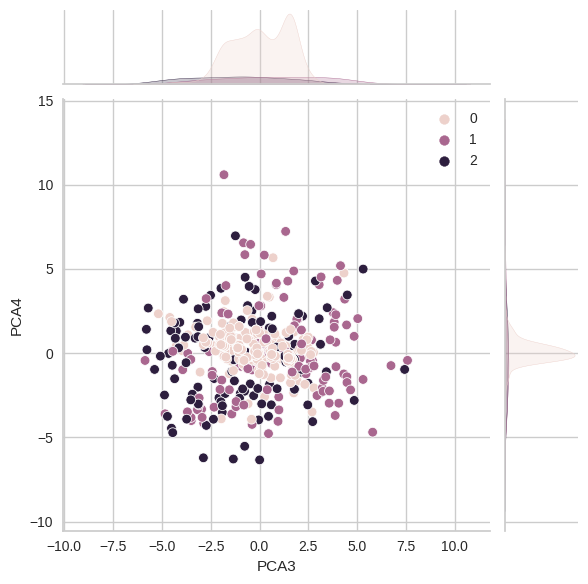





Grafico de las dos componentes vs cluester y centroides


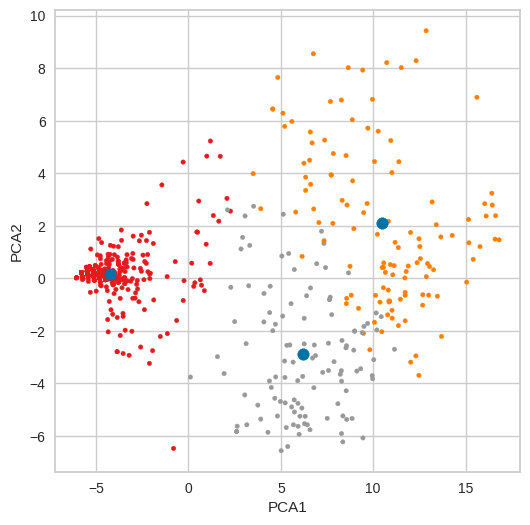

In [29]:
pca_analysis(df_breast_cancer_vif_corre,new_target_colum_number,X_train,4)

In [ ]:
X_train_balanced, y_train_balanced = balancing_for_class('ROS',X_train, y_train, X_test, y_test)

y_test  original:  (array([2, 4]), array([92, 48]))
y_train original:  (array([2, 4]), array([366, 193]))
y_train balanceado:  (array([2, 4]), array([366, 366]))


In [ ]:
supervised_models_classification(X_train, y_train,X_test, y_test)

KNN, Exactitud:  0.9428571428571428
DT, Exactitud:  0.9285714285714286
B, Exactitud:  0.9642857142857143
RF, Exactitud:  0.95
AB, Exactitud:  0.9357142857142857
SVM, Exactitud:  0.9285714285714286
ET, Exactitud:  0.95
LR, Exactitud:  0.9428571428571428
GB, Exactitud:  0.95
QDA, Exactitud:  0.9142857142857143
LDA, Exactitud:  0.95
GNB, Exactitud:  0.9142857142857143


In [ ]:
supervised_models_classification(X_train_balanced, y_train_balanced,X_test, y_test)

KNN, Exactitud:  0.9285714285714286
DT, Exactitud:  0.95
B, Exactitud:  0.9285714285714286
RF, Exactitud:  0.95
AB, Exactitud:  0.9214285714285714
SVM, Exactitud:  0.95
ET, Exactitud:  0.95
LR, Exactitud:  0.9428571428571428
GB, Exactitud:  0.95
QDA, Exactitud:  0.9142857142857143
LDA, Exactitud:  0.95
GNB, Exactitud:  0.9142857142857143


In [ ]:
y_test_to_cr,y_train_to_cr = conver_y(y_train_balanced,y_test)

------------------------------------------------------------
METRICAS DE DESEMPEÑO


Matriz de confusiòn






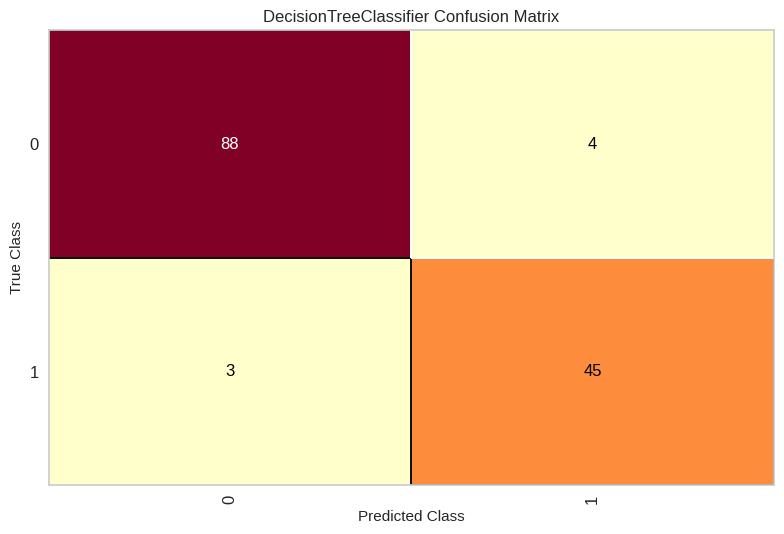



Exactitud global del  modelo: 0.95


Precisiòn global del modelo: 0.9427001569858713


Ratio global del modelo: 0.9470108695652174


Reporte especifico del modelo


              precision    recall  f1-score   support

           0       0.97      0.96      0.96        92
           1       0.92      0.94      0.93        48

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140





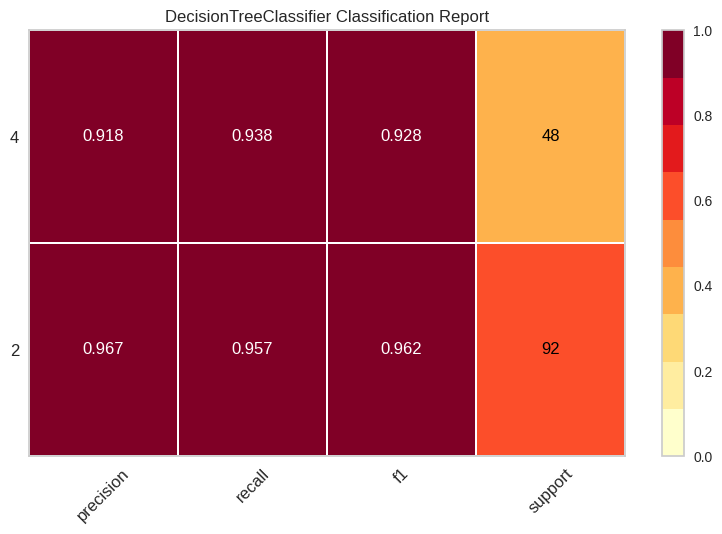



Error de predicciòn por clase




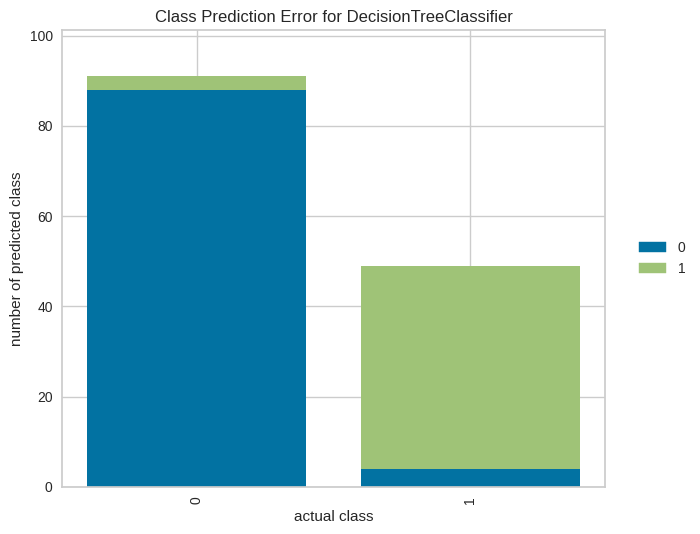

In [ ]:
model_DT = DecisionTreeClassifier(random_state=0)
metrics_to_clasification(model_DT,X_test,y_test_to_cr,X_train_balanced,y_train_to_cr,df_breast_cancer['Class'].unique())

In [ ]:
model_LR = LogisticRegression(random_state=0, max_iter=200)

# Se definen los hiperparámetros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

best_LR = optimization_models(model_LR,param_grid,X_train, y_train)

-----------------------------------------------------------
Optimización de modelos
Fitting 3 folds for each of 140 candidates, totalling 420 fits
[CV 1/3] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=0.001, penalty=l1, solver=liblinear;, score=0.652 total time=   0.0s
[CV 2/3] END C=0.001, penalty=l1, solver=liblinear;, score=0.656 total time=   0.0s
[CV 3/3] END C=0.001, penalty=l1, solver=liblinear;, score=0.656 total time=   0.0s
[CV 1/3] END .....C=0.001, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END .....C=0.001, pena

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/3] END C=0.001, penalty=none, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=0.01, penalty=l1, solver=liblinear;, score=0.968 total time=   0.0s
[CV 2/3] END C=0.01, penalty=l1, solver=liblinear;, score=0.930 total time=   0.0s
[CV 3/3] END C=0.01, penalty=l1, solver=liblinear;, score=0.984 total time=   0.0s
[CV 1/3] END ......C=0.01, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END ......C=0.01, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END ......C=0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END .C=0.01, penalty=none, solver=saga;, score=0.957 total time=   0.0s
[CV 2/3] END .C=0.01, penalty=none, solver=saga;, score=0.957 total time=   0.0s
[CV 3/3] END .C=0.01, penalty=none, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=0.1, penalty=l1, solver=liblinear;, score=0.973 total time=   0.0s
[CV 2/3] END C=0.1, penalty=l1, solver=liblinear;, score=0.952 total time=   0.0s
[CV 3/3] END C=0.1, penalty=l1, solver=liblinear;, score=0.989 total time=   0.0s
[CV 1/3] END .......C=0.1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END ....C=0.1, penalty=l2, solver=saga;, score=0.968 total time=   0.0s
[CV 2/3] END ....C=0.1, penalty=l2, solver=saga;, score=0.952 total time=   0.0s
[CV 3/3] END ....C=0.1, penalty=l2, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END C=0.1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END C=0.1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END C=0.1, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END C=0.1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END C=0.1, penalty=elasticnet, solver=liblinear;, score=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END ..C=0.1, penalty=none, solver=saga;, score=0.957 total time=   0.0s
[CV 2/3] END ..C=0.1, penalty=none, solver=saga;, score=0.957 total time=   0.0s
[CV 3/3] END ..C=0.1, penalty=none, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END .C=1, penalty=l1, solver=liblinear;, score=0.968 total time=   0.0s
[CV 2/3] END .C=1, penalty=l1, solver=liblinear;, score=0.962 total time=   0.0s
[CV 3/3] END .C=1, penalty=l1, solver=liblinear;, score=0.989 total time=   0.0s
[CV 1/3] END .........C=1, p

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 3/3] END ...C=1, penalty=none, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 1/3] END .C=1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END .C=1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END .C=1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END .....C=1, penalty=none, solver=sag;, score=0.957 total time=   0.0s
[CV 2/3] END .....C=1, penalty=none, solver=sag;, score=0.957 total time=   0.0s
[CV 3/3] END .....C=1, penalty=none, solver=sag;, score=0.989 total time=   0.0s
[CV 1/3] END ....C=1, penalty=none, solver=saga;, score=0.957 total time=   0.0s
[CV 2/3] END ....C=1, penalty=none, solver=saga;, score=0.957 total time=   0.0s
[CV 3/3] END ....C=1, penalty=none, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END ..C=10, penalty

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END .....C=10, penalty=l1, solver=saga;, score=0.963 total time=   0.0s
[CV 2/3] END .....C=10, penalty=l1, solver=saga;, score=0.957 total time=   0.0s
[CV 3/3] END .....C=10, penalty=l1, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END C=10, penalty=l2, solver=newton-cg;, score=0.963 total time=   0.0s
[CV 2/3] END C=10, penalty=l2, solver=newton-cg;, score=0.957 total time=   0.0s
[CV 3/3] END C=10, penalty=l2, solver=newton-cg;, score=0.989 total time=   0.0s
[CV 1/3] END ....C=10, penalty=l2, solver=lbfgs;, score=0.963 total time=   0.0s
[CV 2/3] END ....C=10, penalty=l2, solver=lbfgs;, score=0.957 total time=   0.0s
[CV 3/3] END ....C=10, penalty=l2, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 1/3] END C=10, penalty=l2, solver=liblinear;, score=0.963 total time=   0.0s
[CV 2/3] END C=10, penalty=l2, solver=liblinear;, score=0.957 total time=   0.0s
[CV 3/3] END C=10, penalty=l2, solver=liblinear;, score=0.989 total time=   0.0s
[CV 1/3] END ......C=10, pen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END .....C=10, penalty=l2, solver=saga;, score=0.963 total time=   0.0s
[CV 2/3] END .....C=10, penalty=l2, solver=saga;, score=0.957 total time=   0.0s
[CV 3/3] END .....C=10, penalty=l2, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END C=10, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END C=10, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END C=10, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=10, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END C=10, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END C=10, penalty=elasticnet, solver=liblinear;, score=nan total

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV 3/3] END ....C=100, penalty=l1, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END C=100, penalty=l2, solver=newton-cg;, score=0.957 total time=   0.0s
[CV 2/3] END C=100, penalty=l2, solver=newton-cg;, score=0.957 total time=   0.0s
[CV 3/3] END C=100, penalty=l2, solver=newton-cg;, score=0.989 total time=   0.0s
[CV 1/3] END ...C=100, penalty=l2, solver=lbfgs;, score=0.957 total time=   0.0s
[CV 2/3] END ...C=100, penalty=l2, solver=lbfgs;, score=0.957 total time=   0.0s
[CV 3/3] END ...C=100, penalty=l2, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 1/3] END C=100, penalty=l2, solver=liblinear;, score=0.957 total time=   0.0s
[CV 2/3] END C=100, penalty=l2, solver=liblinear;, score=0.957 total time=   0.0s
[CV 3/3] END C=100, penalty=l2, solver=liblinear;, score=0.989 total time=   0.0s
[CV 1/3] END .....C=100, penalty=l2, solver=sag;, score=0.957 total time=   0.0s
[CV 2/3] END .....C=100, penalty=l2, solver=sag;, score=0.957 total time=   0.0s
[CV 3/3] END .....C=10

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py


[CV 3/3] END ....C=100, penalty=l2, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END C=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END C=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END C=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END C=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END C=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END C=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END C=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END C=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END C=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END C=100, penalty=elasticnet, solver=sag;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV 3/3] END ...C=100, penalty=none, solver=sag;, score=0.989 total time=   0.0s
[CV 1/3] END ..C=100, penalty=none, solver=saga;, score=0.957 total time=   0.0s
[CV 2/3] END ..C=100, penalty=none, solver=saga;, score=0.957 total time=   0.0s
[CV 3/3] END ..C=100, penalty=none, solver=saga;, score=0.989 total time=   0.0s
[CV 1/3] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=1000, penalty=l1, solver=liblinear;, score=0.957 total time=   0.0s
[CV 2/3] END C=1000, penalty=l1, solver=liblinear;, score=0.957 total time=   0.0s
[CV 3/3] END C=1000, pen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV 2/3] END C=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END C=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END C=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END C=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END C=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END C=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END C=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END C=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END C=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END C=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END C=1000, penalty=elasticnet, solver=sag

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

In [ ]:
best_LR.best_estimator_

LogisticRegression(C=1, max_iter=200, penalty='l1', random_state=0,
                   solver='liblinear')

In [89]:
train_data = pd.DataFrame(X_train, columns=df_breast_cancer_vif_corre.columns.values[0:-1],)
y_train_ = y_train.to_numpy()
train_data['Class'] = y_train_

test_data = pd.DataFrame(X_test, columns=df_breast_cancer_vif_corre.columns.values[0:-1])
y_test_ = y_test.to_numpy()
test_data['Class'] = y_test_
autogluon_best_model(train_data,test_data,df_breast_cancer_vif_corre.columns.values[-1])

No path specified. Models will be saved in: "AutogluonModels/ag-20230918_011122/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230918_011122/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jun 9 10:57:30 UTC 2023
Disk Space Avail:   81.17 GB / 115.66 GB (70.2%)
Train Data Rows:    559
Train Data Columns: 8
Label Column: Class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [2, 4]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 4, class 0 = 2
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents posi

-----------------------------------------------------------
AUTOGLUON


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}
Fitting 13 L1 models .

                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            LightGBMXT    0.957143   0.973214        0.002729       0.002692  1.570948                 0.002729                0.002692           1.570948            1       True          3
1   WeightedEnsemble_L2    0.957143   0.973214        0.004251       0.003448  2.126773                 0.001522                0.000757           0.555825            2       True         14
2              LightGBM    0.957143   0.973214        0.007212       0.003534  0.338971                 0.007212                0.003534           0.338971            1       True          4
3              CatBoost    0.950000   0.964286        0.001959       0.003257  0.689657                 0.001959                0.003257           0.689657            1       True          7
4         LightGBMLarge    0.950000   0.94642

Evaluation: accuracy on test data: 0.9571428571428572
Evaluations on test data:
{
    "accuracy": 0.9571428571428572,
    "balanced_accuracy": 0.957427536231884,
    "mcc": 0.9062762017979119,
    "roc_auc": 0.9873188405797102,
    "f1": 0.9387755102040817,
    "precision": 0.92,
    "recall": 0.9583333333333334
}
Computing feature importance via permutation shuffling for 8 features using 140 rows with 5 shuffle sets...
	0.28s	= Expected runtime (0.06s per shuffle set)
	0.08s	= Actual runtime (Completed 5 of 5 shuffle sets)


Plot summary of models saved to file: AutogluonModels/ag-20230918_011122/SummaryOfModels.html
*** End of fit() summary ***
{'model_types': {'KNeighborsUnif': 'KNNModel', 'KNeighborsDist': 'KNNModel', 'LightGBMXT': 'LGBModel', 'LightGBM': 'LGBModel', 'RandomForestGini': 'RFModel', 'RandomForestEntr': 'RFModel', 'CatBoost': 'CatBoostModel', 'ExtraTreesGini': 'XTModel', 'ExtraTreesEntr': 'XTModel', 'NeuralNetFastAI': 'NNFastAiTabularModel', 'XGBoost': 'XGBoostModel', 'NeuralNetTorch': 'TabularNeuralNetTorchModel', 'LightGBMLarge': 'LGBModel', 'WeightedEnsemble_L2': 'WeightedEnsembleModel'}, 'model_performance': {'KNeighborsUnif': 0.9642857142857143, 'KNeighborsDist': 0.9642857142857143, 'LightGBMXT': 0.9732142857142857, 'LightGBM': 0.9732142857142857, 'RandomForestGini': 0.9553571428571429, 'RandomForestEntr': 0.9553571428571429, 'CatBoost': 0.9642857142857143, 'ExtraTreesGini': 0.9553571428571429, 'ExtraTreesEntr': 0.9642857142857143, 'NeuralNetFastAI': 0.9642857142857143, 'XGBoost': 0.9

# **SEAM PHASE I WELL LOG DATA**

In [90]:
%cd /content
!mkdir SEAM
%cd /content/SEAM
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1aESUgUeKLJehlfRDhz3etQGYNJXmIu1K' -O Wells_Regression_Delta.csv

/content
/content/SEAM
--2023-09-18 01:12:37--  https://docs.google.com/uc?export=download&id=1aESUgUeKLJehlfRDhz3etQGYNJXmIu1K
Resolving docs.google.com (docs.google.com)... 108.177.120.113, 108.177.120.138, 108.177.120.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.120.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fplv06ku3v7shmn396rpili53bj5vl1e/1694999550000/11849440450678359784/*/1aESUgUeKLJehlfRDhz3etQGYNJXmIu1K?e=download&uuid=4e146ba2-da69-43ff-b269-d62166b2df9c [following]
--2023-09-18 01:12:38--  https://doc-10-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fplv06ku3v7shmn396rpili53bj5vl1e/1694999550000/11849440450678359784/*/1aESUgUeKLJehlfRDhz3etQGYNJXmIu1K?e=download&uuid=4e146ba2-da69-43ff-b269-d62166b2df9c
Resolving doc-10-8c-docs.googleusercontent.com (doc-10-8c-docs.googleusercontent.com)...

# **BDPARKINSON**

Intra-operative microelectrode records were acquired in 5 (4 males and 1 female) awake and unmedicated Parkinson’s patients who were subject to deep brain implantation under electrostimulation. The patients, aged between 49 and 61 years, participated voluntarily assuming previously signed con- sent. Microelectrode records were made using the ISIS MER

Inomed system, which is used to obtain an optimal location of the destination (target) through deep brain stimulation. Visualization of neural data started 10mm on the target data. Each 1mm a new location was created if the distance between the microelectrode and the destination point was greater than 3mm. For distances less than 3mm, the locations were created every 0.5mm. Specialists in neurosurgery and neurophysiology labeled the obtained signals using the MER system. The acquisition time for each record was 2 seconds with a sampling frequency of 24kHz (24000 samples per second). In total, the database is comprised of 52 micro recordings, 13 for each of the subcortical structures: Thalamus nucleus (TAL), Zona Incerta (Zi), Subthalamic nucleus (STN) and Substantia Nigra (SNR). These surgical procedures were performed at the Institute of Epilepsy and Parkinson in Pereira, Colombia.

In [91]:
%cd /content
!mkdir BDParkinson
%cd /content/BDParkinson
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1aGjLU5ypG7GDefhQCmiSjlseW6Tms4h-' -O BDParkinson_Prediction.csv

/content
/content/BDParkinson
--2023-09-18 01:15:13--  https://docs.google.com/uc?export=download&id=1aGjLU5ypG7GDefhQCmiSjlseW6Tms4h-
Resolving docs.google.com (docs.google.com)... 64.233.181.139, 64.233.181.101, 64.233.181.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.181.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2cj57smj1l9mcbtqprbe3cp3bcat7dk8/1694999700000/11849440450678359784/*/1aGjLU5ypG7GDefhQCmiSjlseW6Tms4h-?e=download&uuid=a5a6fa2f-718f-4f1a-a9c8-1ccca3d89755 [following]
--2023-09-18 01:15:14--  https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2cj57smj1l9mcbtqprbe3cp3bcat7dk8/1694999700000/11849440450678359784/*/1aGjLU5ypG7GDefhQCmiSjlseW6Tms4h-?e=download&uuid=a5a6fa2f-718f-4f1a-a9c8-1ccca3d89755
Resolving doc-0k-8c-docs.googleusercontent.com (doc-0k-8c-docs.googleusercontent.com)

In [92]:
df_parkinson = pd.read_csv('/content/BDParkinson/BDParkinson_Prediction.csv')


In [94]:
general_analysis(df_parkinson,6)

---------------------------------------------------------------------
ANALISIS GENERAL


Número de clases 4


Nombre de las caracteristicas, conteo de cantidades, verificación de valores nulos, tipo de dato por cada caracteristica


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VAR1    500 non-null    float64
 1   VAR2    500 non-null    float64
 2   VAR3    500 non-null    float64
 3   VAR4    500 non-null    float64
 4   VAR5    500 non-null    float64
 5   VAR6    500 non-null    float64
 6   CLASS   500 non-null    object 
dtypes: float64(6), object(1)
memory usage: 27.5+ KB
None


Cantidad de filas duplicadas
0


Cantidad de valores NAN por caracteristica
VAR1     0
VAR2     0
VAR3     0
VAR4     0
VAR5     0
VAR6     0
CLASS    0
dtype: int64


Caracteristicas numericas
         VAR1      VAR2      VAR3      VAR4      VAR5      VAR6
0    0.62473

In [103]:
tranfor = [i for i in range(len(df_parkinson['CLASS'].unique()))]
df_parkinson['CLASS'].replace(df_parkinson['CLASS'].unique(),
                        tranfor, inplace=True)

In [106]:
df_parkinson

VAR1      VAR2      VAR3      VAR4      VAR5      VAR6  CLASS
0    0.624731  0.135424  0.000000  0.675282  0.182203  0.962960      0
1    0.647223  0.136211  0.000000  0.679511  0.195903  0.987387      0
2    0.706352  0.187593  0.000000  0.632989  0.244884  0.991182      0
3    0.680291  0.192076  0.000000  0.651786  0.233528  0.991857      0
4    0.660104  0.161131  0.000000  0.677162  0.209531  0.991066      0
..        ...       ...       ...       ...       ...       ...    ...
495  0.712586  0.219776  0.510939  0.593045  0.268087  0.092055      3
496  0.686058  0.224004  0.518661  0.600564  0.253298  0.093827      3
497  0.698661  0.216604  0.505791  0.591165  0.241696  0.090734      3
498  0.714926  0.222613  0.562420  0.587406  0.271037  0.093245      3
499  0.698690  0.219577  0.541828  0.583647  0.258280  0.091973      3

[500 rows x 7 columns]

---------------------------------------------------------------------
ANALISIS DE FRECUENCIA


frecuencia por clase: 


0    125
1    125
2    125
3    125
Name: CLASS, dtype: int64


Medida de tendencia central


             VAR1        VAR2        VAR3        VAR4        VAR5        VAR6  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.735121    0.197308    0.467928    0.696034    0.282903    0.314853   
std      0.075174    0.068170    0.302631    0.144894    0.105843    0.391511   
min      0.613236    0.109302    0.000000    0.515038    0.140636    0.045782   
25%      0.671658    0.134198    0.274775    0.576128    0.216137    0.090241   
50%      0.716317    0.218196    0.527671    0.642387    0.268986    0.102930   
75%      0.805635    0.246461    0.585586    0.737429    0.341426    0.616969   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            CLASS  
count  500.000000  
mean     1.50000

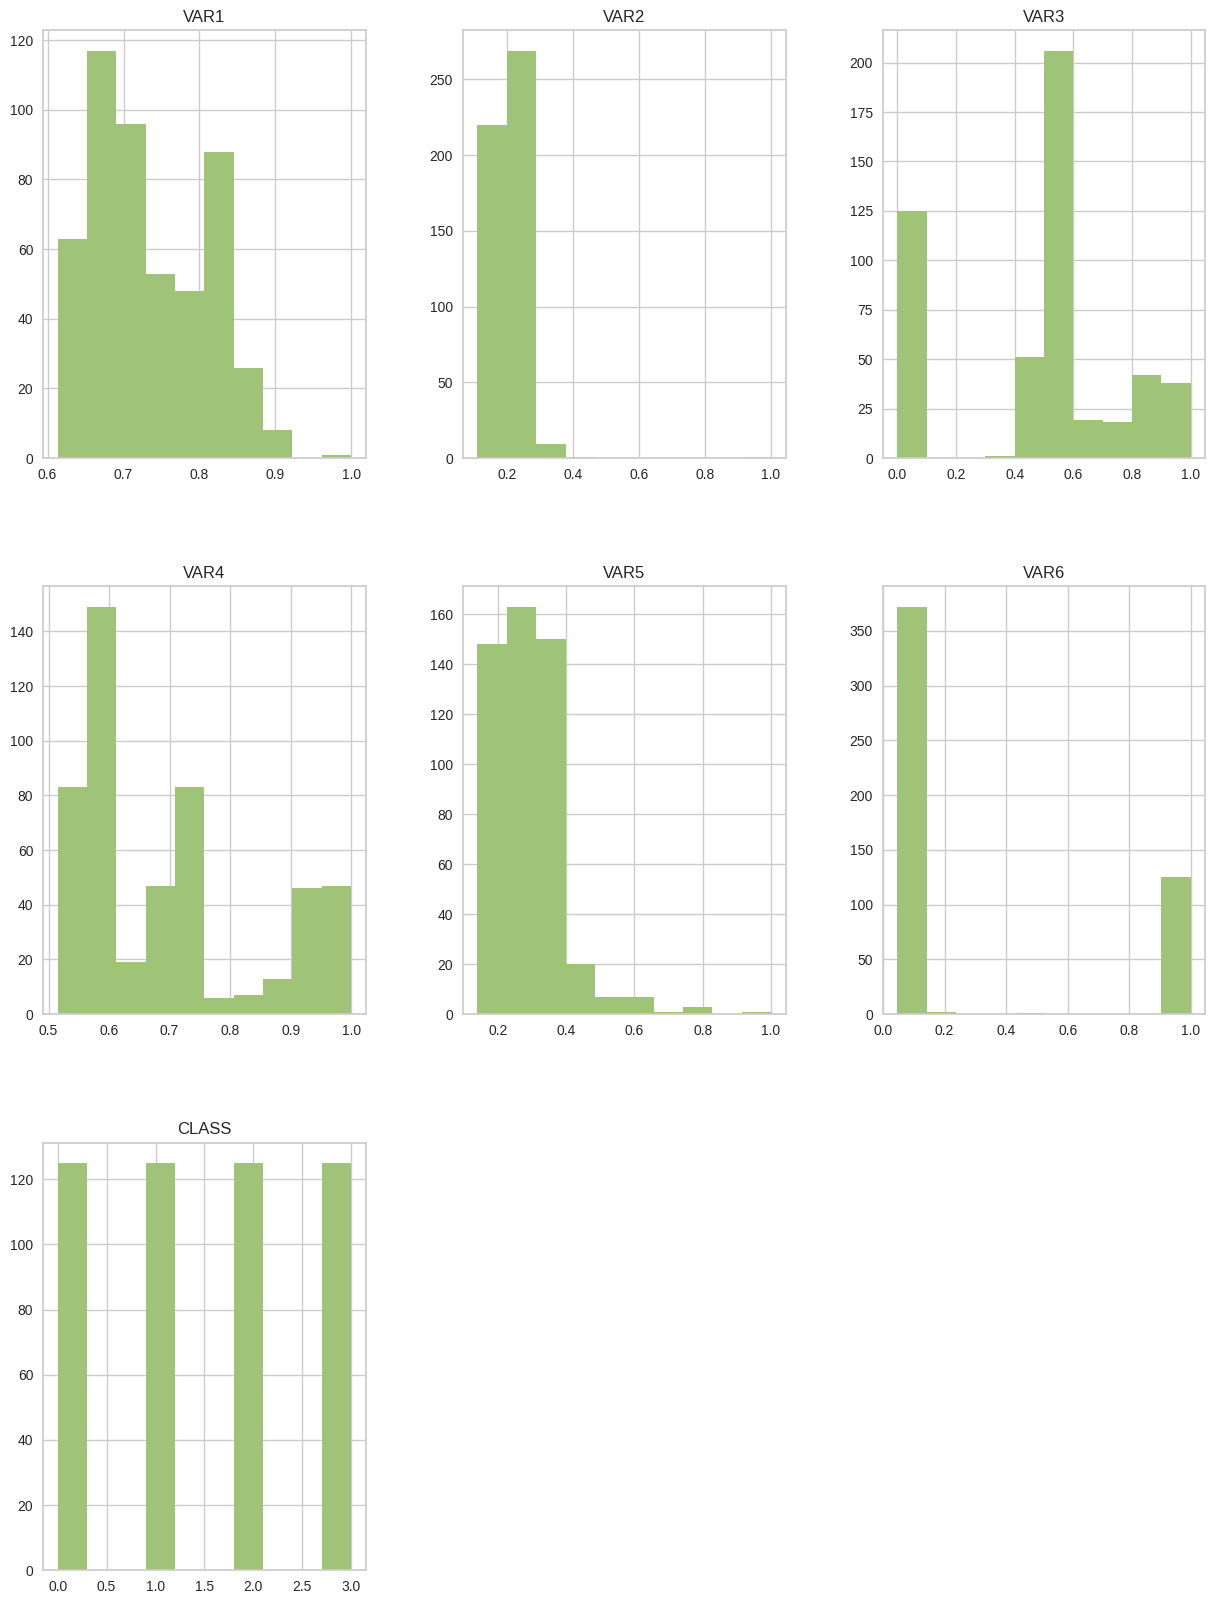



Diagrama de violin




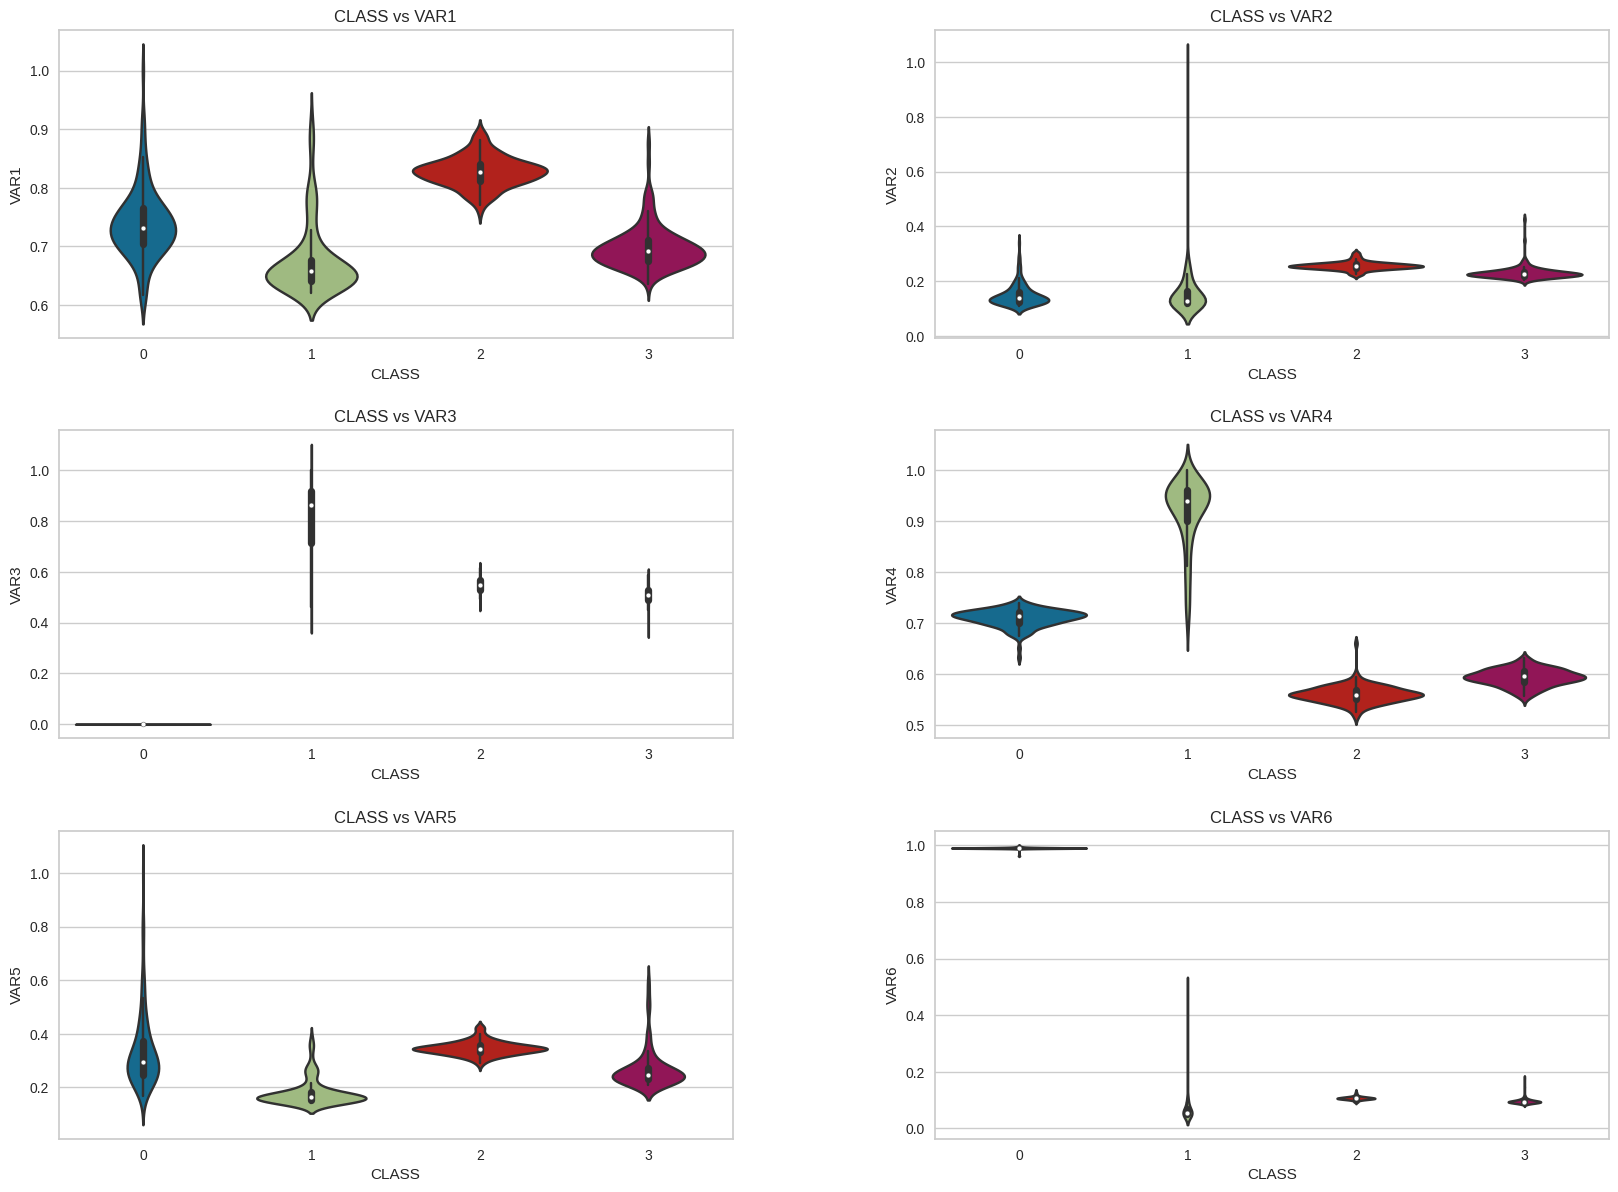







Diagrama de cajas




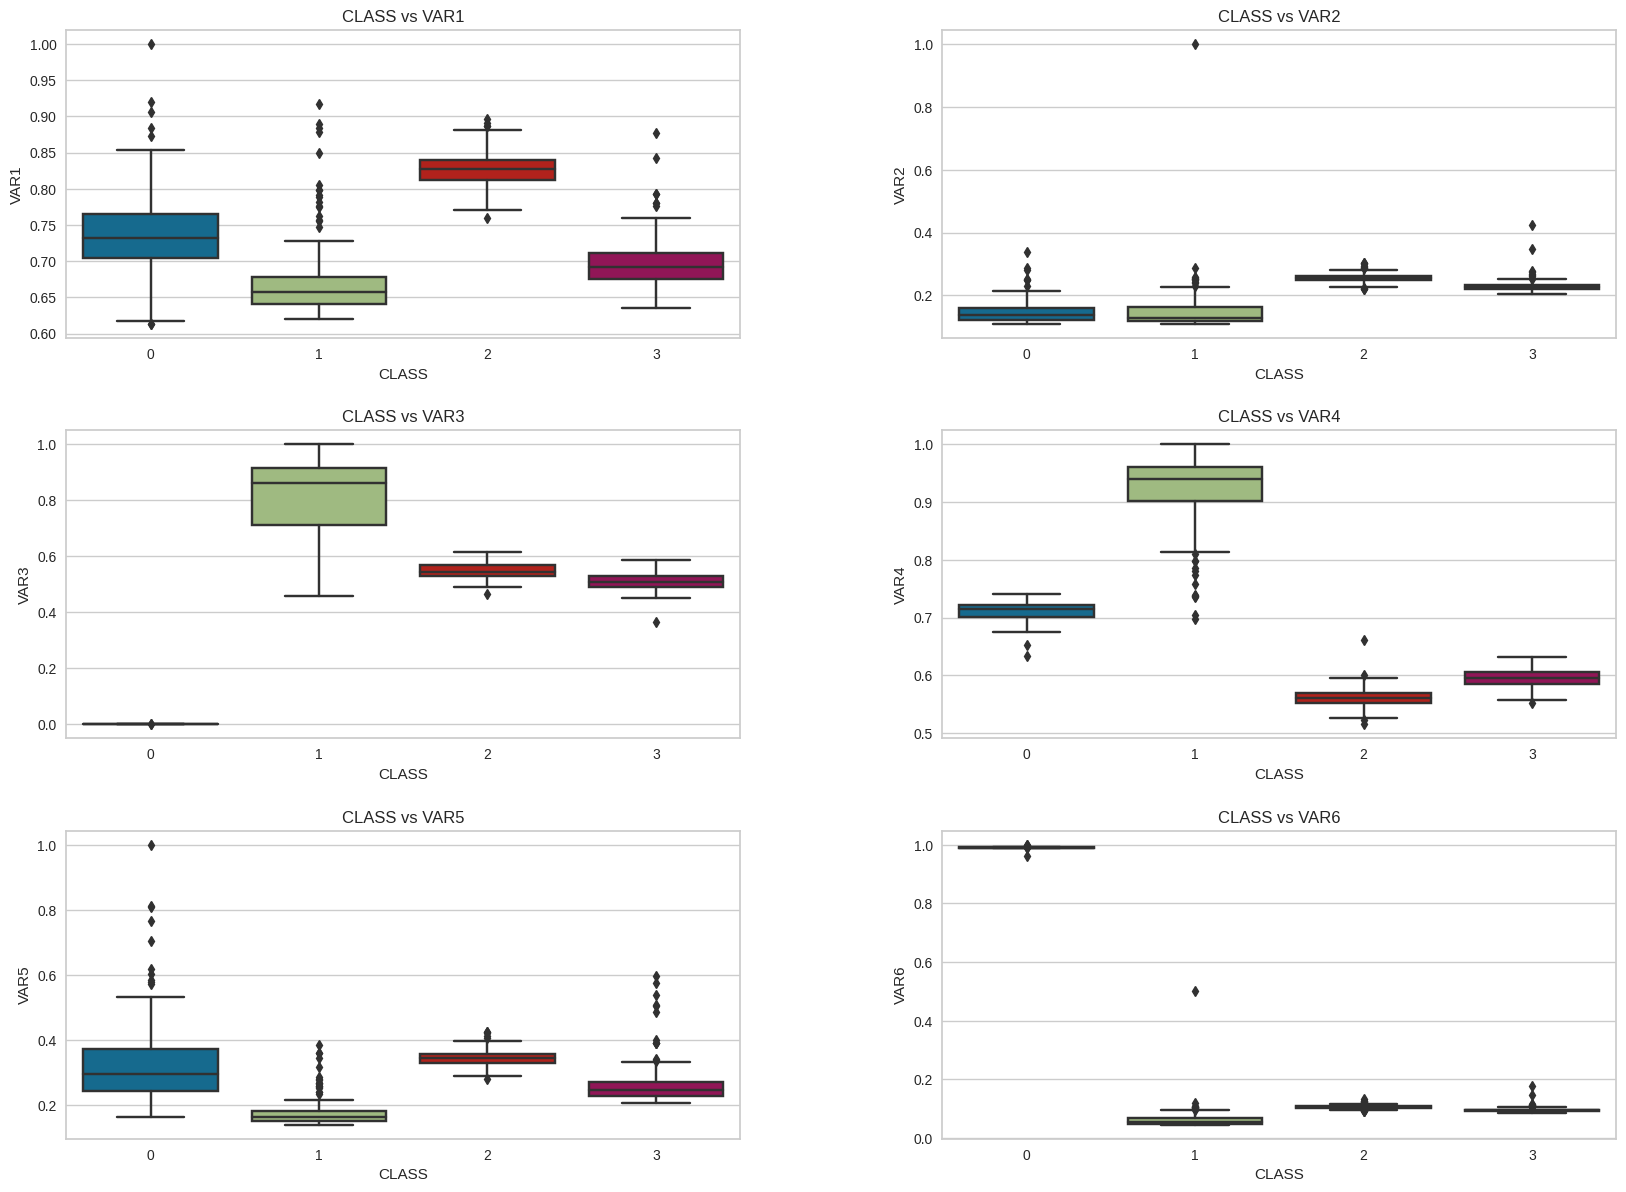

In [107]:
frequentist_analysis(df_parkinson,6)

---------------------------------------------------------------------
ANALISIS DE CORRELACIÓN


Coeficientes de correlación
           VAR1      VAR2      VAR3      VAR4      VAR5      VAR6     CLASS
VAR1   1.000000  0.576977 -0.253137 -0.612760  0.830722  0.065330  0.046506
VAR2   0.576977  1.000000  0.065845 -0.647360  0.465732 -0.344490  0.568869
VAR3  -0.253137  0.065845  1.000000  0.357690 -0.477345 -0.913283  0.467376
VAR4  -0.612760 -0.647360  0.357690  1.000000 -0.545582  0.013846 -0.546514
VAR5   0.830722  0.465732 -0.477345 -0.545582  1.000000  0.323021 -0.041671
VAR6   0.065330 -0.344490 -0.913283  0.013846  0.323021  1.000000 -0.754511
CLASS  0.046506  0.568869  0.467376 -0.546514 -0.041671 -0.754511  1.000000


Matriz de correlación


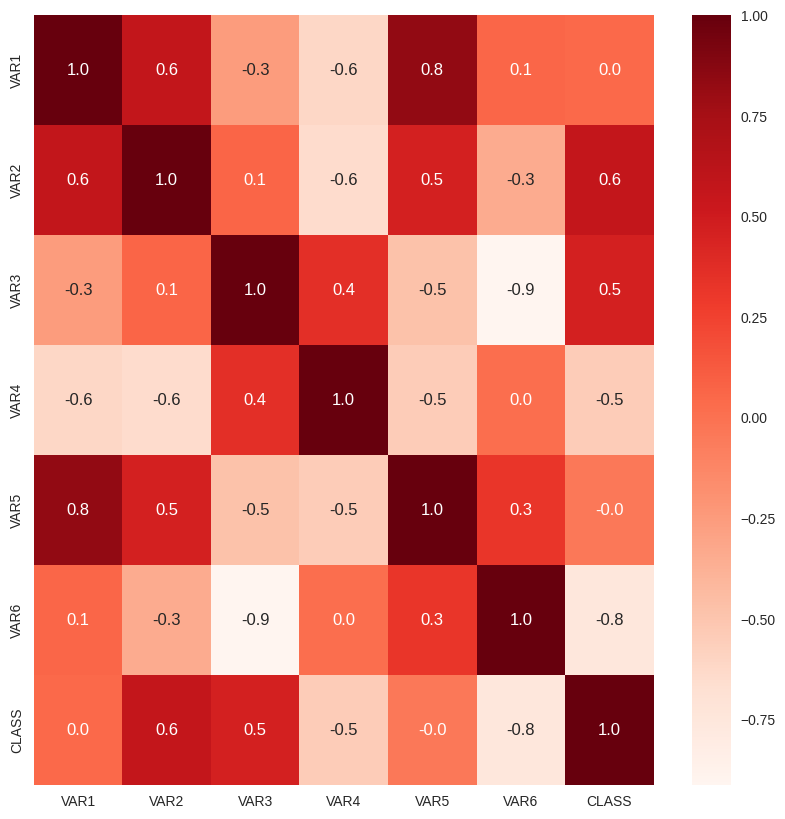



Grafico de correlación


Las caracteriticas a eliminar son ['VAR5', 'VAR6'] de acuerdo con el limite de 0.8 para los coeficientes de correlación


         VAR1      VAR2      VAR3      VAR4  CLASS
0    0.624731  0.135424  0.000000  0.675282      0
1    0.647223  0.136211  0.000000  0.679511      0
2    0.706352  0.187593  0.000000  0.632989      0
3    0.680291  0.192076  0.000000  0.651786      0
4    0.660104  0.161131  0.000000  0.677162      0
..        ...       ...       ...       ...    ...
495  0.712586  0.219776  0.510939  0.593045      3
496  0.686058  0.224004  0.518661  0.600564      3
497  0.698661  0.216604  0.505791  0.591165      3
498  0.714926  0.222613  0.562420  0.587406      3
499  0.698690  0.219577  0.541828  0.583647      3

[500 rows x 5 columns]
Coeficiente VIF:


  feature        VIF
0    VAR1  63.857853
1    VAR2  24.279828
2    VAR3   8.891716
3    VAR4  36.599807
4   CLASS   7.860511


Las caracteriticas a eliminar son ['VAR1', 'VAR2', 'VAR4'] de acuerd

In [108]:
df_parkinson_vif_corre = correlation_analysis(df_parkinson,6,'Si',0.8,'Si',10)

In [113]:
new_target_colum_number

2

In [114]:
list_colum = df_parkinson.columns.values
list_colum_new_data = df_parkinson_vif_corre.columns.values
new_target_colum_number = np.where(list_colum_new_data == list_colum[6])[0][0] +1 #revisar paso de 9 a 8
X_train, X_test, y_train, y_test = split_data(df_parkinson_vif_corre,new_target_colum_number-1,0.2,'C')

----------------------------------------------------------------
PARTICIÒN DE DATASET


Para X train tenemos 400 instancias y 1 caracteristicas


Para X test tenemos 100 instancias y 1 caracteristicas


Para Y train tenemos 400 instancias


Para Y test tenemos 100 instancias




In [115]:
X_train,X_test = norm_data(X_train, X_test, y_train, y_test,'standar')

----------------------------------------------------------------
NORMALZIACIÒN DE DATASET


Se utilizo una normalizacion tipo standar


In [120]:
X_train_to_al, X_test_to_al, y_train_to_al, y_test_to_al = split_data(df_parkinson,6,0.2,'C')

----------------------------------------------------------------
PARTICIÒN DE DATASET


Para X train tenemos 400 instancias y 6 caracteristicas


Para X test tenemos 100 instancias y 6 caracteristicas


Para Y train tenemos 400 instancias


Para Y test tenemos 100 instancias




-----------------------------------------------------------
Importancia de caracteristicas por Clasificador extra de arboles




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


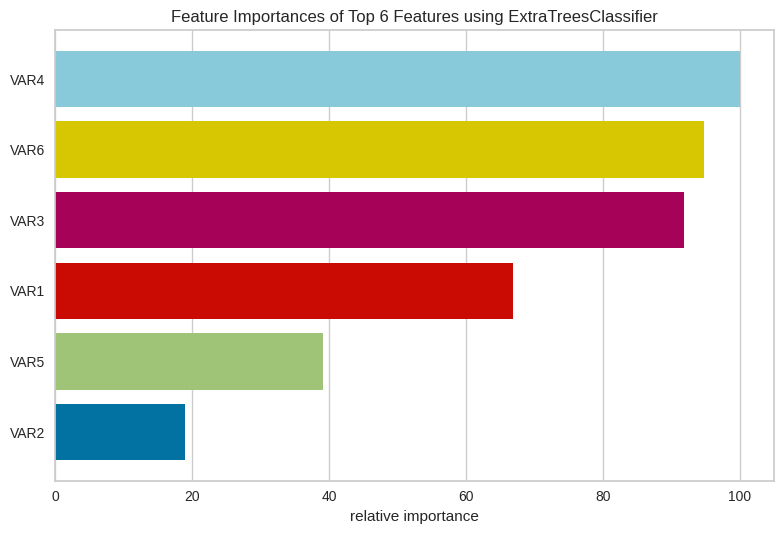



  features  feature_importance
0     VAR1            0.162547
1     VAR2            0.046000
2     VAR3            0.223012
3     VAR4            0.242940
4     VAR5            0.095199
5     VAR6            0.230302


In [131]:
feature_aport_extree(df_parkinson,X_train_to_al, y_train_to_al)

------------------------------------------------------------


Metodo del codo


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[143.393586883379, 29.89379312897165, 8.848955237053197, 6.737918432824739, 4.824864737179825, 3.8117052528371693, 3.0018679812397813, 2.493034722840717, 2.0897295170702135]


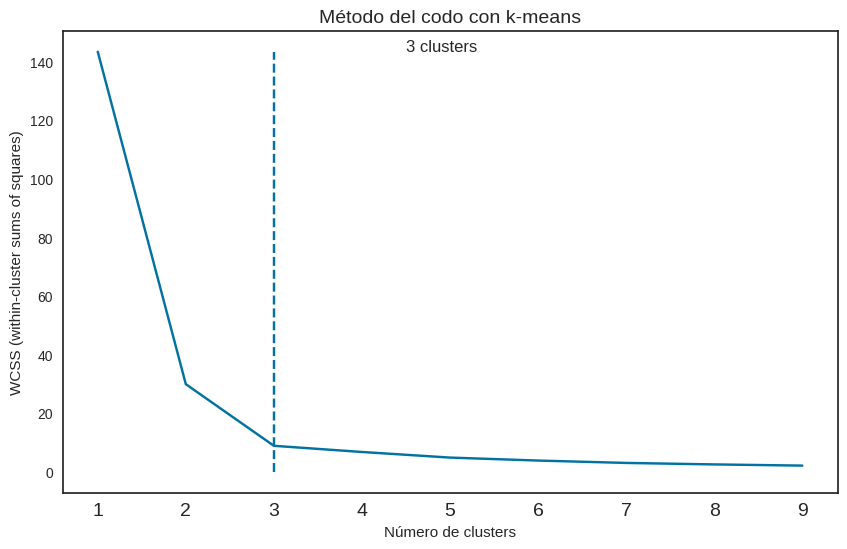





Gráfico de comparación entre las componentes principales y los grupos generados por KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


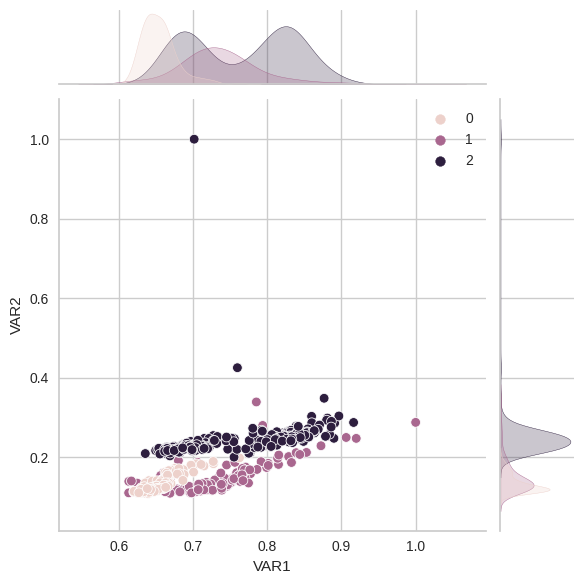

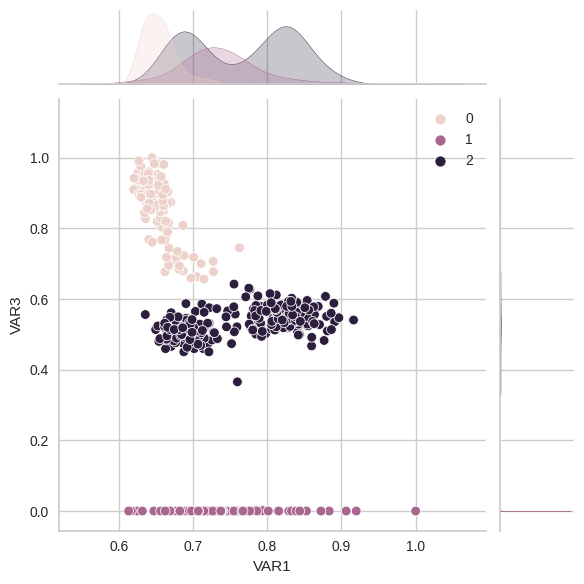

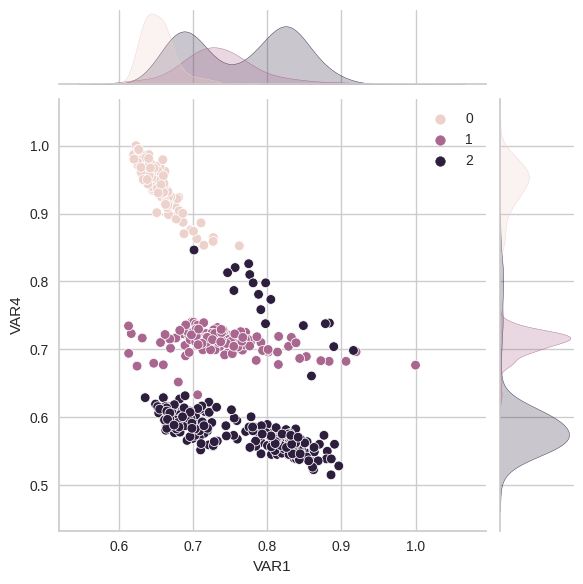

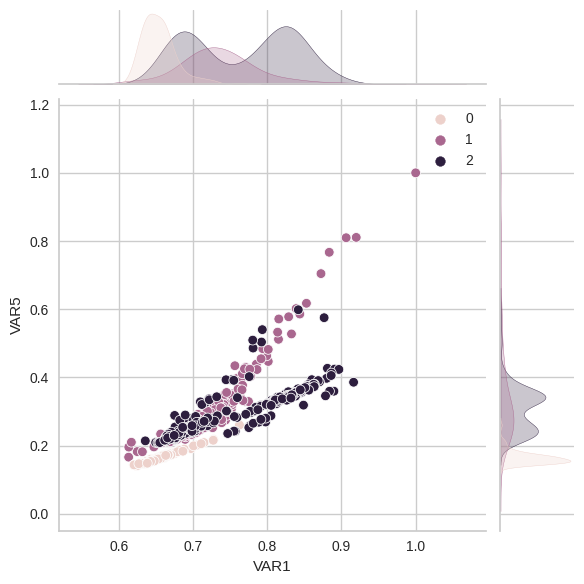

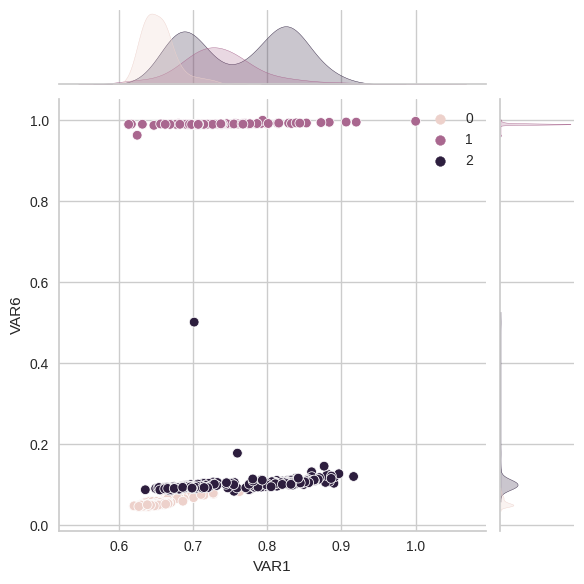

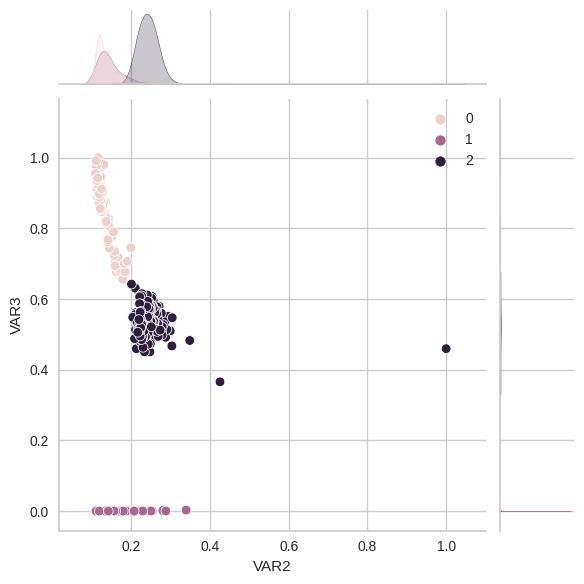

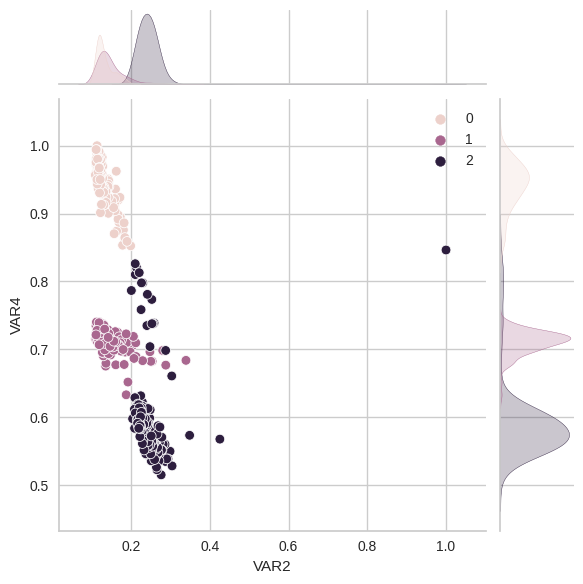

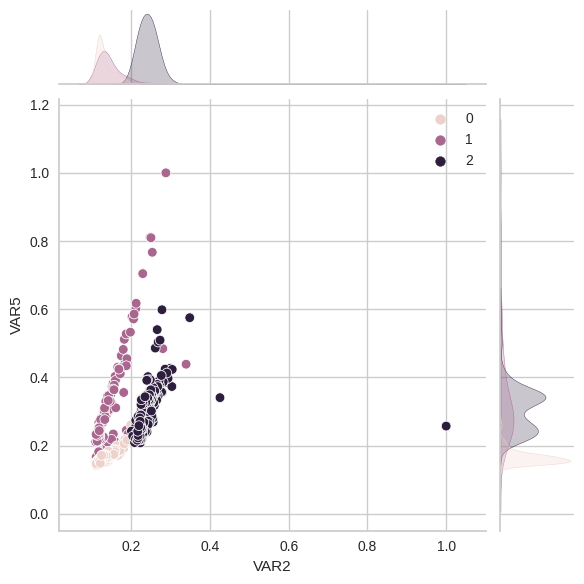

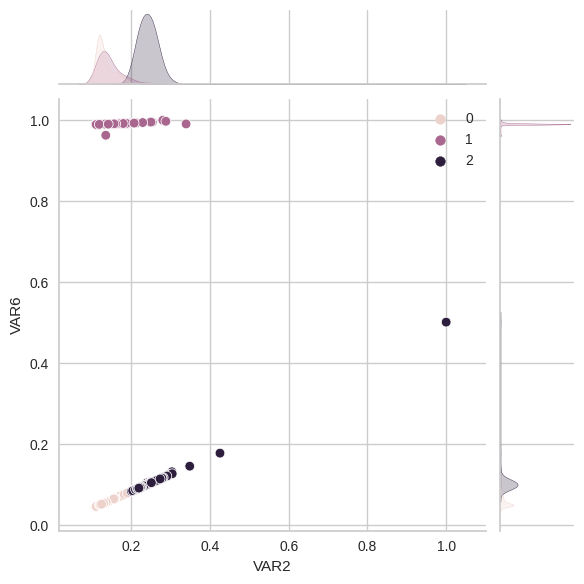

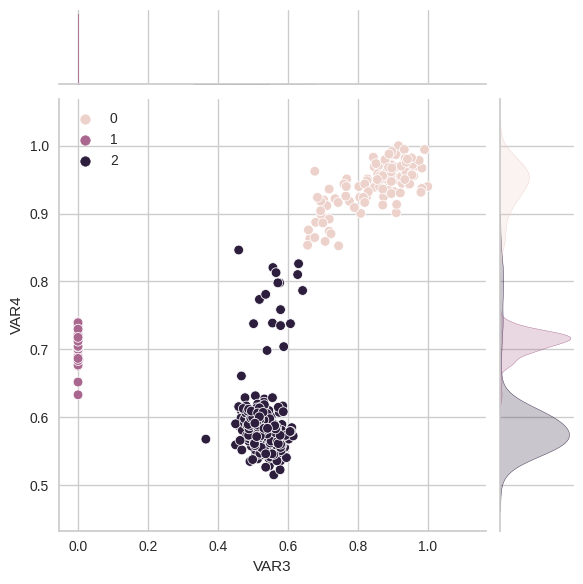

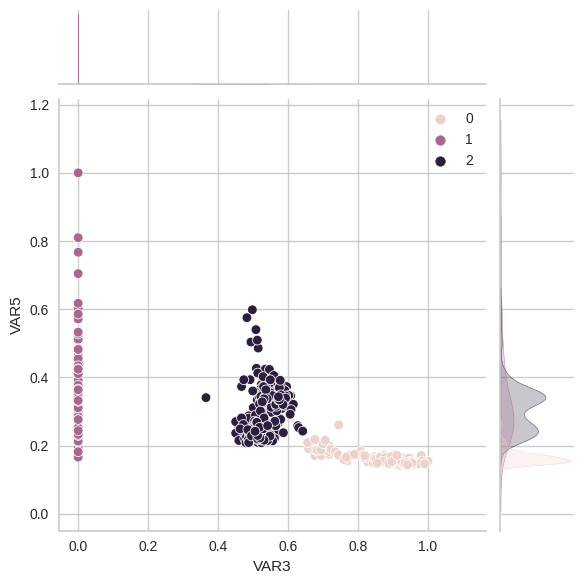

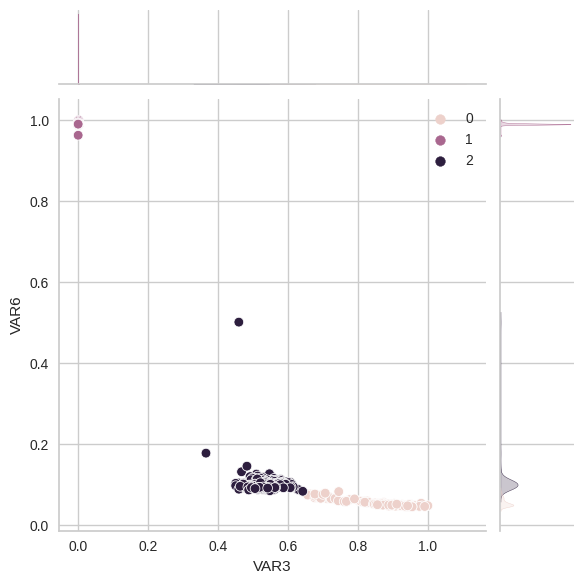

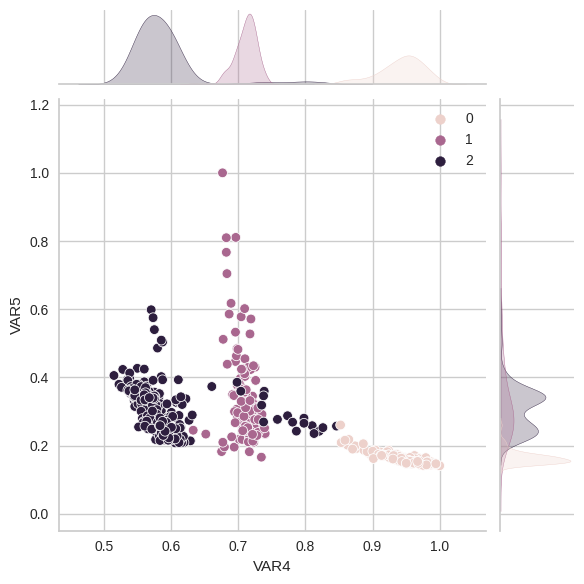

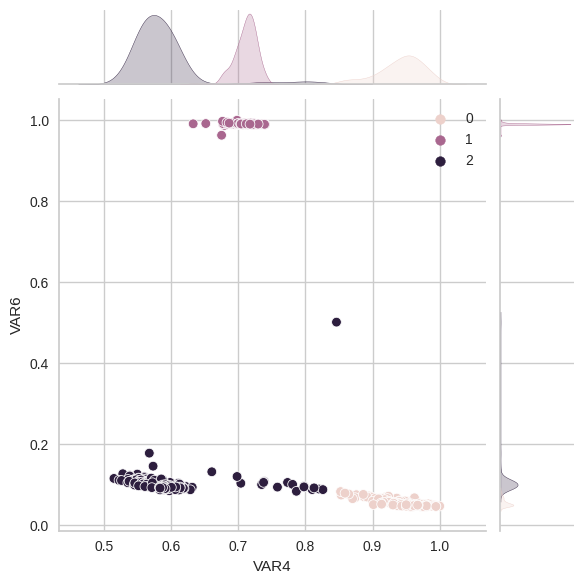

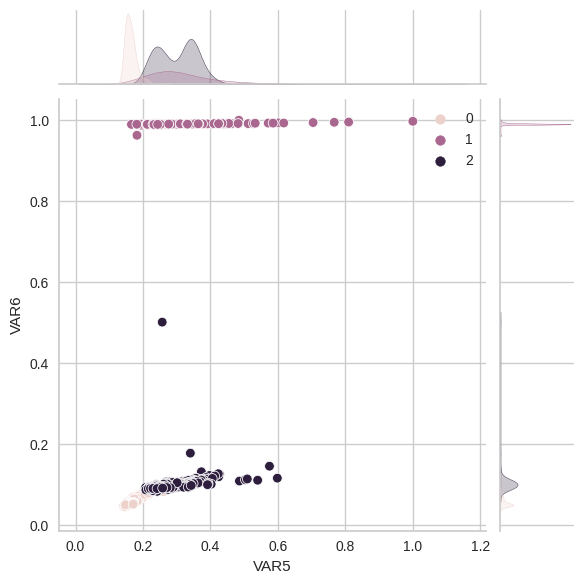





Grafico de las dos componentes vs cluester y centroides


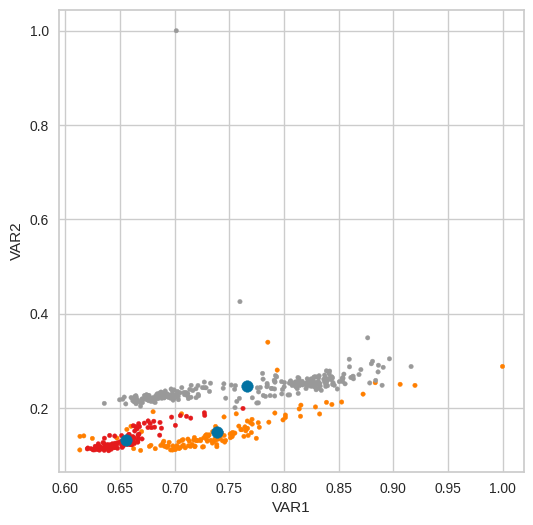

In [138]:
elbow_method(df_parkinson[df_parkinson.columns.values[:-1]],10,3)

------------------------------------------------------------
ANALISIS DE COMPONENTES PRINCIPALES


PCA sin indicar numero de componentes
['VAR1' 'VAR2' 'VAR3' 'VAR4' 'VAR5' 'VAR6']
       VAR1      VAR2  VAR3      VAR4      VAR5      VAR6
0  0.624731  0.135424   0.0  0.675282  0.182203  0.962960
1  0.647223  0.136211   0.0  0.679511  0.195903  0.987387
2  0.706352  0.187593   0.0  0.632989  0.244884  0.991182
3  0.680291  0.192076   0.0  0.651786  0.233528  0.991857
4  0.660104  0.161131   0.0  0.677162  0.209531  0.991066




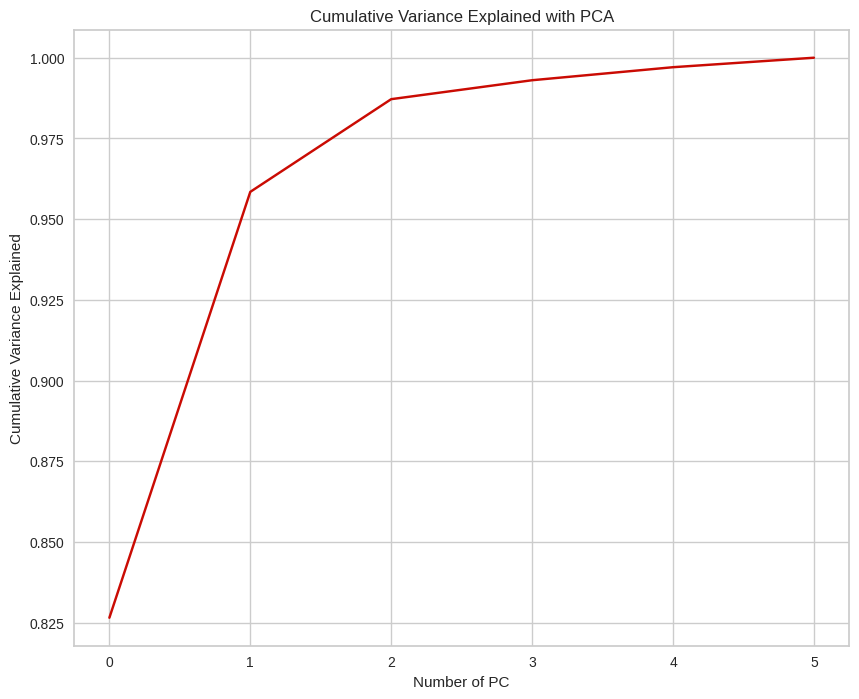



Impacto de las caracteriticas por PCA


           PC1       PC2       PC3       PC4       PC5       PC6
VAR1  0.012145 -0.055199  0.041961 -0.008023  0.015839 -0.019510
VAR2 -0.015564 -0.053439  0.009489  0.036206  0.011265  0.004620
VAR3 -0.293410  0.064120  0.030685 -0.008218  0.014818  0.012513
VAR4 -0.021452  0.138315  0.030672  0.014987 -0.010484 -0.011296
VAR5  0.043546 -0.068468  0.065088 -0.002410 -0.017140  0.009097




Analisis del impacto de las caracteirticas según la primera componente del PCA


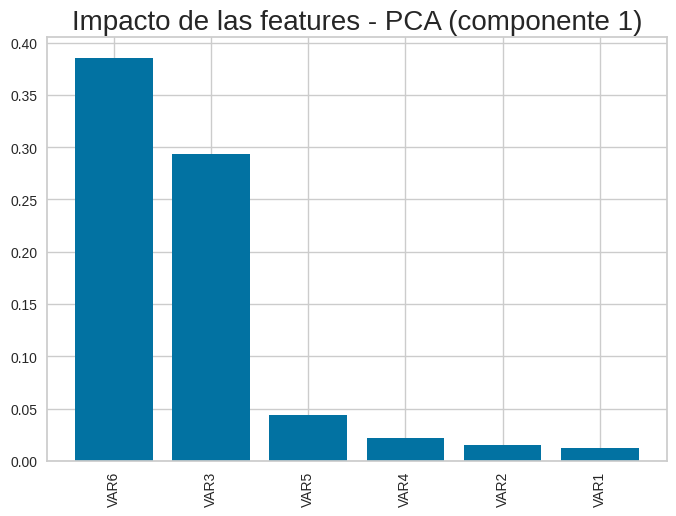





PCA para la cantidad de compontes (3) de acuerdo a lo ingresado
       PCA1      PCA2      PCA3
0  0.785630  0.127230 -0.175069
1  0.806530  0.126829 -0.148843
2  0.815789  0.046927 -0.096071
3  0.813689  0.070654 -0.109307
4  0.810287  0.111080 -0.130638




Gráfico de comparación entre las componentes principales


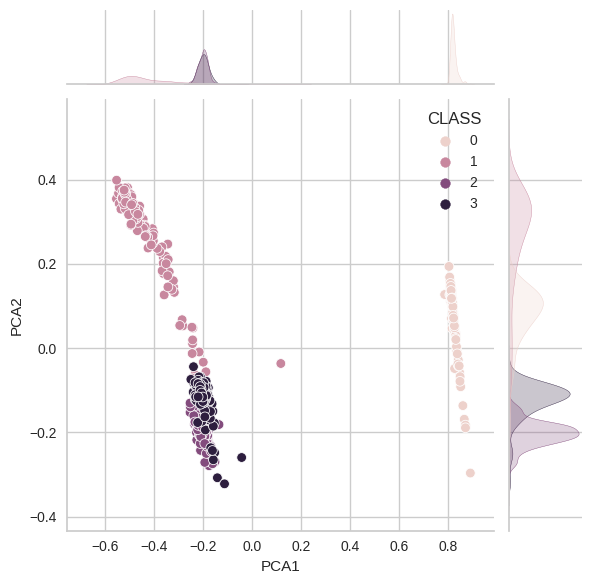

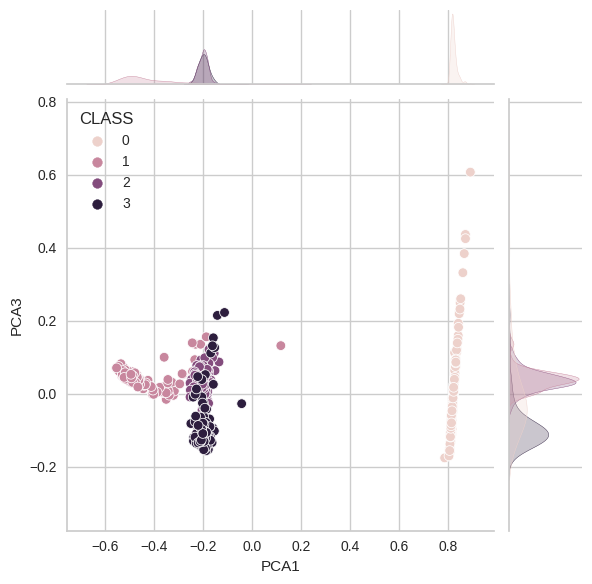

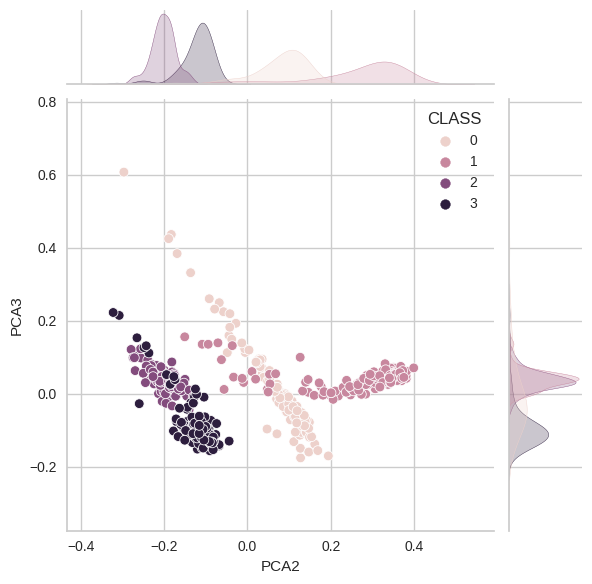



------------------------------------------------------------


Metodo del codo


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[141.55308491984235, 28.055655653692313, 7.01195184334301, 5.106235245996034, 3.2933387954954005, 2.4918235760167824, 2.0182709379562023, 1.6958563884004314, 1.4689557188574442]


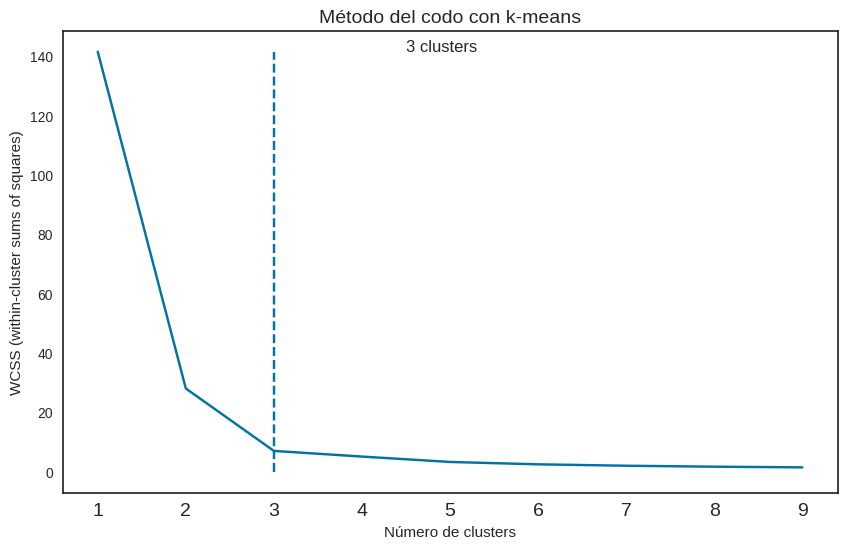





Gráfico de comparación entre las componentes principales y los grupos generados por KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


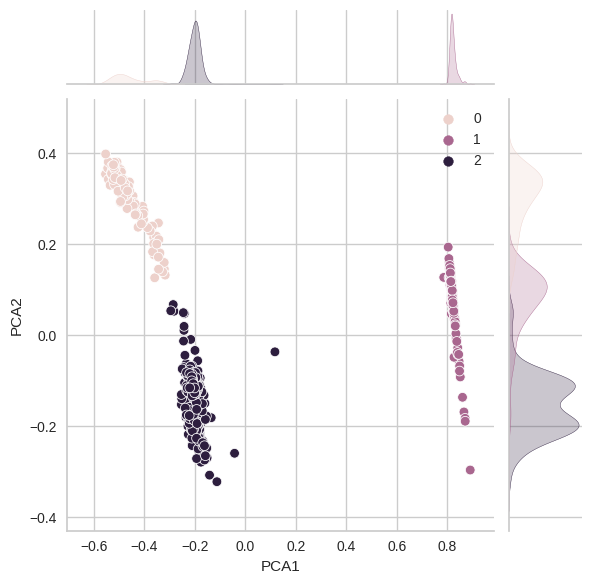

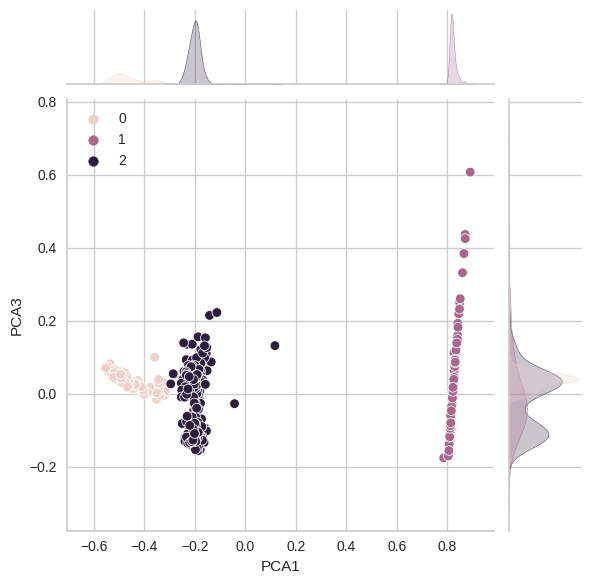

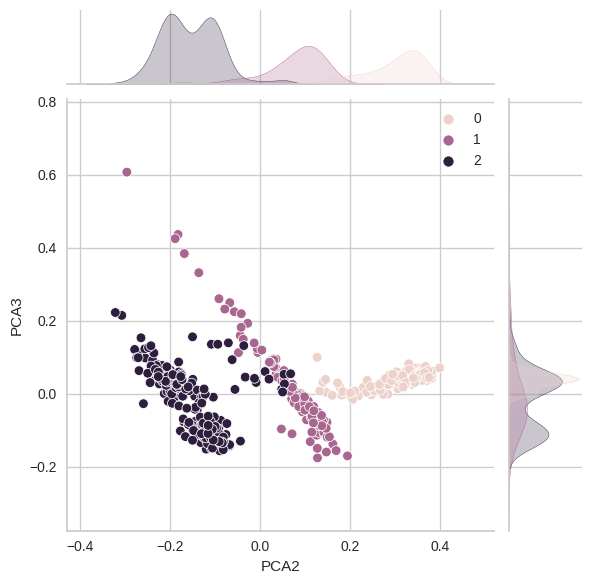





Grafico de las dos componentes vs cluester y centroides


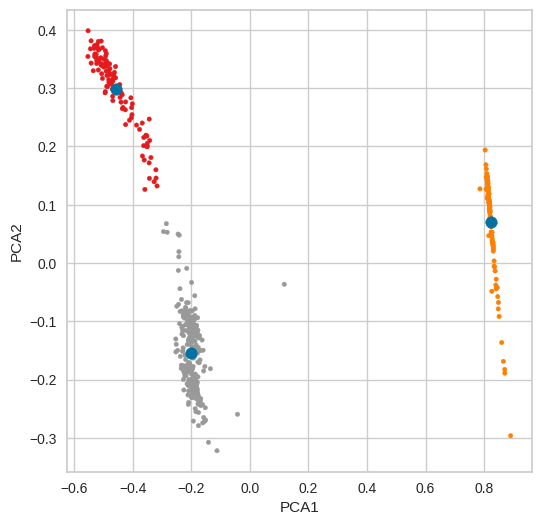

In [139]:
pca_analysis(df_parkinson,6,X_train_to_al,3)

In [140]:
balancing_for_class('ROS',X_train_to_al, y_train_to_al, X_test_to_al, y_test_to_al)

y_test  original:  (array([0, 1, 2, 3]), array([25, 25, 25, 25]))
y_train original:  (array([0, 1, 2, 3]), array([100, 100, 100, 100]))
y_train balanceado:  (array([0, 1, 2, 3]), array([100, 100, 100, 100]))


(         VAR1      VAR2      VAR3      VAR4      VAR5      VAR6
 0    0.787385  0.226185  0.608752  0.578947  0.305132  0.094742
 1    0.694978  0.127126  0.000000  0.695489  0.266977  0.990143
 2    0.706993  0.118902  0.000000  0.706767  0.243510  0.989791
 3    0.713427  0.129563  0.000000  0.699248  0.283095  0.990305
 4    0.639311  0.114076  0.948520  0.943609  0.153114  0.047783
 ..        ...       ...       ...       ...       ...       ...
 395  0.659922  0.122819  0.886744  0.948308  0.163154  0.051446
 396  0.690436  0.221297  0.586873  0.608083  0.237590  0.092694
 397  0.701073  0.227247  0.527671  0.587406  0.251558  0.095185
 398  0.668835  0.203883  0.548262  0.597744  0.227372  0.085401
 399  0.754916  0.239617  0.577864  0.573308  0.391290  0.100370
 
 [400 rows x 6 columns],
 0      2
 1      0
 2      0
 3      0
 4      1
       ..
 395    1
 396    3
 397    3
 398    3
 399    3
 Name: CLASS, Length: 400, dtype: int64)

In [141]:
supervised_models_classification(X_train_to_al, y_train_to_al, X_test_to_al, y_test_to_al)

KNN, Exactitud:  1.0
DT, Exactitud:  0.99
B, Exactitud:  0.99
RF, Exactitud:  0.98
AB, Exactitud:  0.75
SVM, Exactitud:  0.98
ET, Exactitud:  1.0
LR, Exactitud:  0.98
GB, Exactitud:  0.99
QDA, Exactitud:  1.0
LDA, Exactitud:  1.0
GNB, Exactitud:  0.98


In [ ]:
X_train_to_al, y_train_to_al, X_test_to_al, y_test_to_al

------------------------------------------------------------
METRICAS DE DESEMPEÑO


Matriz de confusiòn






/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


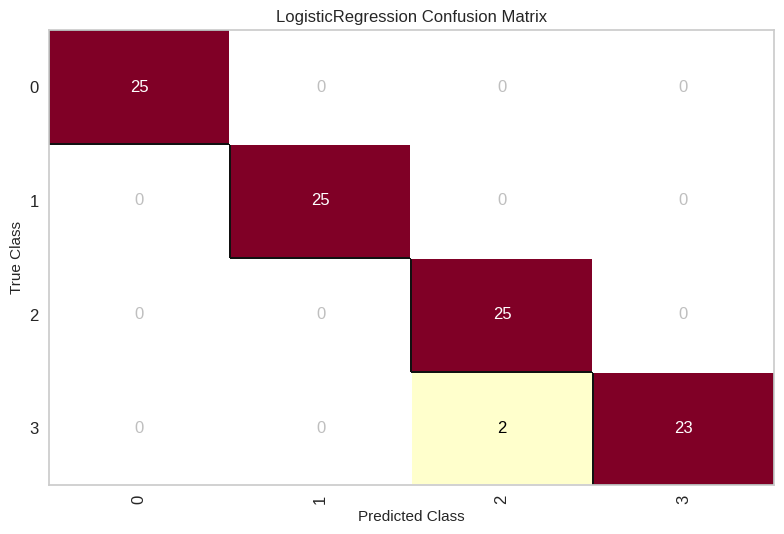



Exactitud global del  modelo: 0.98


Precisiòn global del modelo: 0.9814814814814815


Ratio global del modelo: 0.98


Reporte especifico del modelo


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       0.93      1.00      0.96        25
           3       1.00      0.92      0.96        25

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ModelError: ignored

In [144]:
y_test_to_cr,y_train_to_cr = conver_y(y_train_to_al,y_test_to_al)
model_LR = LogisticRegression(random_state=0)
metrics_to_clasification(model_LR,X_test_to_al,y_test_to_cr,X_train_to_al,y_train_to_cr,df_breast_cancer['Class'].unique())

In [ ]:

y_test_to_cr,y_train_to_cr = conver_y(y_train_to_al,y_test_to_al)
metrics_to_clasification(model_app_metrics,X_test,y_test_to_cr,X_train_to_al,y_train_to_cr,df_parkinson['Class'].unique())

# **FUNCTION CREATION**

In [5]:
def general_analysis(df,number_colum_target):

  #General analysis of dataset
  print('---------------------------------------------------------------------')
  print('ANALISIS GENERAL')
  print('\n')

  print(f'Número de clases {len(df.iloc[:,number_colum_target].value_counts())}')
  print('\n')

  print('Nombre de las caracteristicas, conteo de cantidades, verificación de valores nulos, tipo de dato por cada caracteristica')
  print('\n')
  print(df.info())
  print('\n')

  print('Cantidad de filas duplicadas')
  print(df.duplicated().sum())
  print('\n')

  print('Cantidad de valores NAN por caracteristica')
  print(df.isna().sum())
  print('\n')

  print('Caracteristicas numericas')
  print(df.select_dtypes(exclude='object'))
  print('\n')

  print('Caracteristicas categoricas')
  print(df.select_dtypes(include='object')) #review!!!
  print('\n')


In [6]:
# def is_string_series(s : pd.Series): #https://stackoverflow.com/questions/43049545/python-check-if-dataframe-column-contain-string-type
#     if isinstance(s.dtype, pd.StringDtype):
#         # The series was explicitly created as a string series (Pandas>=1.0.0)
#         return True
#     elif s.dtype == 'object':
#         # Object series, check each value
#         return all((v is None) or isinstance(v, str) for v in s)
#     else:
#         return False

def fill_in_missing_data_cancer(df,number_colum_target):

  dff = deepcopy(df)
  df_categorical = dff.select_dtypes(include='object')
  names_colu_catego = df_categorical.columns


  for names in names_colu_catego.tolist():


    count_value  = dff[names].value_counts()
    val_most_common = count_value.index[0]#calculate value most common
    dff[names] = pd.to_numeric(dff[names], errors= 'coerce')#convert atipic to NAN
    dff[names] = dff[names].fillna(val_most_common).astype(int)


    # try:
    #   dff[names] = pd.to_numeric(dff[names], errors= 'coerce',downcast=float)#convert atipic to NAN
    #   dff[names] = dff[names].fillna(val_most_common).astype(int)

    # except:
    #   dff[names] = pd.to_numeric(dff[names], errors= 'coerce')#convert atipic to NAN
    #   dff[names] = dff[names].fillna(val_most_common)

  print('Nuevo dataset con fill_miss_df')
  print('\n')
  print(dff.info())

  return dff

In [7]:
def frequentist_analysis(df,number_colum_target):#Que pasa si las caracteriticas son numericas?
  names_columns = list(df.columns)
  target_name = names_columns[number_colum_target]
  list_categories_target = df[target_name].astype('category')
  list_categories_target =  list_categories_target.cat.categories.tolist()

  print('---------------------------------------------------------------------')
  print('ANALISIS DE FRECUENCIA')
  print('\n')

  print('frecuencia por clase: ')
  print('\n')
  print(df[target_name].value_counts())
  print('\n')

  print('Medida de tendencia central')
  print('\n')
  print(df.describe())
  print('\n')

  print('Cantidad de muestras asociadas a  las clases {} presentes la categoria {}:'.format(list_categories_target,target_name))
  print('\n')
  print(df.groupby(target_name).count())
  print('\n')


  print('Histogramas de caracteristicas')
  print('\n')
  df.hist(figsize = (15,20), color='g')
  plt.show()
  print('\n')
  print('Diagrama de violin')
  print('\n')

  num_rows = int((df.shape[1]/3)+1)*2
  num_colum = 2

  fig = plt.figure(figsize=(20,30))
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  for ind,item in enumerate(names_columns):

    if ind != (number_colum_target):
      ax = fig.add_subplot(num_rows, num_colum, ind + 1)
      sns.violinplot(data=df,x=target_name,y=item)
      ax.set_xlabel(target_name)
      ax.set_ylabel(item)
      ax.set_title(str(target_name)+' vs '+item)

  plt.show()

  print('\n')
  print('\n')
  print('\n')
  print('Diagrama de cajas')
  print('\n')

  fig1 = plt.figure(figsize=(20,30))
  fig1.subplots_adjust(hspace=0.3, wspace=0.3)

  for ind,item in enumerate(names_columns):

    if ind != (number_colum_target):
      ax1 = fig1.add_subplot(num_rows, num_colum, ind + 1)
      sns.boxplot(data=df,x=target_name,y=item)
      ax1.set_xlabel(target_name)
      ax1.set_ylabel(item)
      ax1.set_title(str(target_name)+' vs '+item)

  plt.show()

In [8]:
def correlation_analysis(df,number_colum_target,drop_correlation,threshold_drop_correlation,drop_vif,threshold_drop_vif):

  names_columns = list(df.columns)
  target_name = names_columns[number_colum_target]
  df_end = deepcopy(df)

  print('---------------------------------------------------------------------')
  print('ANALISIS DE CORRELACIÓN')
  print('\n')

  print('Coeficientes de correlación')
  corr = df.corr()
  print(corr)
  print('\n')

  print('Matriz de correlación')
  plt.figure(figsize=(10,10))
  sns.heatmap(corr,fmt='.1f',annot=True,cmap='Reds')
  plt.show()
  print('\n')

  print('Grafico de correlación')
  # sns.pairplot(df, hue=target_name)
  # plt.show()
  print('\n')


  if drop_correlation == 'Si':
    corr_abs = corr.abs()
    upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold_drop_correlation)]

    if to_drop:
      print('Las caracteriticas a eliminar son {} de acuerdo con el limite de {} para los coeficientes de correlación'.format(to_drop,threshold_drop_correlation))
      df = df.drop(list(to_drop),axis=1)


    else:
      print('No existen caracteriticas con con un coeficiente de correlación que supere el limite de ',threshold_drop_correlation)

    print('\n')
    print(df)

  if drop_vif == 'Si':

    columns_vif = list(df.columns)
    vif_data = pd.DataFrame()
    vif_data["feature"] = columns_vif
    vif_data["VIF"] = [variance_inflation_factor(df[columns_vif].values, i) for i in range(len(df[columns_vif].columns))]

    print('Coeficiente VIF:')
    print('\n')
    print(vif_data)
    print('\n')

    list_drop_vif = list((vif_data[ vif_data['VIF'] > threshold_drop_vif]["feature"])) #5-10 https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
    if list_drop_vif:
      print('Las caracteriticas a eliminar son {} de acuerdo con el limite de {} para los coeficientes del VIF'.format(list_drop_vif,threshold_drop_vif))
      print(type(list_drop_vif))
      df = df.drop(list_drop_vif,axis=1)

    else:
      print('No existen caracteriticas con con un coeficiente de correlación que supere el limite de ',threshold_drop_vif)


    df[target_name] = df_end[target_name]

    return df

In [130]:
def feature_aport_extree(X,X_train, y_train):
  print('-----------------------------------------------------------')
  print('Importancia de caracteristicas por Clasificador extra de arboles')
  print('\n')
  model = ExtraTreesClassifier(random_state=0)
  model.fit(X_train, y_train)

  # Mostrar la importancia de características
  viz = FeatureImportances(model, topn=6,labels=X.columns.values)
  viz.fit(X_train, y_train,)
  viz.show()
  print('\n')
  feature_importances=pd.DataFrame({'features':X.columns.values[0:-1],'feature_importance':model.feature_importances_})
  print(feature_importances)

In [10]:
def split_data(df,number_colum_target,test_size_,problem_ml):

  names_columns = list(df.columns)
  target_name = names_columns[number_colum_target]


  if problem_ml == 'R':
    strati = None

  if problem_ml == 'C':
    strati = df[target_name]


  X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target_name]), df[target_name],
                                                    test_size=test_size_, random_state=1, stratify=strati)
  print('----------------------------------------------------------------')
  print('PARTICIÒN DE DATASET')
  print('\n')
  print('Para X train tenemos {} instancias y {} caracteristicas'.format(np.shape(X_train)[0],np.shape(X_train)[1]))
  print('\n')
  print('Para X test tenemos {} instancias y {} caracteristicas'.format(np.shape(X_test)[0],np.shape(X_test)[1]))
  print('\n')
  print('Para Y train tenemos {} instancias'.format(np.shape(y_train)[0]))
  print('\n')
  print('Para Y test tenemos {} instancias'.format(np.shape(y_test)[0]))
  print('\n')
  return  X_train, X_test, y_train, y_test


In [11]:
def norm_data(X_train, X_test, y_train, y_test,norma_type):

  print('----------------------------------------------------------------')
  print('NORMALZIACIÒN DE DATASET')
  print('\n')

  if norma_type == 'standar':
    scaler = StandardScaler()

  if norma_type == 'minmax':
    scaler = MinMaxScaler()

  if norma_type == 'robust':
    scaler = RobustScaler()

  if norma_type == 'maxabs':
    scaler = MaxAbsScaler()

  if norma_type == 'normal':
    scaler = QuantileTransformer(output_distribution='normal')

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  print('Se utilizo una normalizacion tipo {}'.format(norma_type))

  return X_train,X_test


In [12]:
def elbow_method(data_pca,max_cluster,view_bs): #https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/
  max_cluster = 10
  print("------------------------------------------------------------")
  print('\n')
  print('Metodo del codo') #Futura mejora, calcular la derivada de cada linea hasta que sea casi constante,
  #para indicar cual seria el mejor grupo, tambien podria usarse la 3 deirvada
  wcss = []
  for i in range(1, max_cluster):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
  print(wcss)

  with plt.style.context('seaborn-white'):

    plt.figure(figsize=(10,6))
    plt.plot(range(1, max_cluster), wcss)
    plt.title('Método del codo con k-means',fontsize=14)
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.xticks(fontsize=14)
    plt.vlines(x=view_bs,ymin=0,ymax=max(wcss),linestyles='--')
    plt.text(x=4.5,y=max(wcss),s='3 clusters')
    plt.show()
    print('\n')
    print('\n')

  kmeans = KMeans(n_clusters=view_bs, random_state=0).fit(data_pca)

  print("Gráfico de comparación entre las componentes principales y los grupos generados por KMeans")
  pca_names = data_pca.columns.values
  mat_combination  = list(combinations(pca_names, 2))
  len_combination = len(mat_combination)


  for index,pcas_compa in enumerate(mat_combination):
    sns.jointplot(data=data_pca, x = pcas_compa[0],y = pcas_compa[1], hue = kmeans.labels_)

  plt.show()
  print('\n')
  print('\n')

  # Gráfico de las dos componentes, los clusters, y los centroides
  print('Grafico de las dos componentes vs cluester y centroides')
  plt.figure(figsize=(6,6))
  plt.scatter(np.array(data_pca)[:,0], np.array(data_pca)[:,1], s=10, c=kmeans.labels_, cmap='Set1')
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="b", s=70)
  plt.xlabel(data_pca.columns.values[0])
  plt.ylabel(data_pca.columns.values[1])

  plt.show()

In [13]:
def pca_analysis(df,num_colum_target,X_train,num_components):

  names_columns = df.columns.values
  Y = df [names_columns[num_colum_target]]
  X = df [names_columns[0:num_colum_target]]
  print("------------------------------------------------------------")
  print('ANALISIS DE COMPONENTES PRINCIPALES')
  print('\n')
  print('PCA sin indicar numero de componentes')

  pca = PCA()
  pca.fit(X)
  print(pca.feature_names_in_)
  data_pca = pca.transform(X)
  data_pca = pd.DataFrame(X)
  print(data_pca.head())
  print('\n')

  # Plot the cumulative variance explained
  plt.figure(figsize = (10, 8))
  plt.plot(list(range(X.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-') #La varianza explicada es una medida de qué parte de la varianza total en el conjunto de datos original se explica por cada componente principal. La varianza explicada de un componente principal es igual al valor propio asociado con ese componente.
  plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
  plt.title('Cumulative Variance Explained with PCA');
  plt.show()
  print('\n')

  print('Impacto de las caracteriticas por PCA')
  print('\n')
  loadings = pd.DataFrame(data=pca.components_.T * np.sqrt(pca.explained_variance_),
                        columns=[f'PC{i}' for i in range(1, X_train.shape[1]+ 1)],
                        index=names_columns[0:num_colum_target])

  print(loadings.head())
  print('\n')
  print('\n')
  print('Analisis del impacto de las caracteirticas según la primera componente del PCA')
  pc1_loadings = abs(loadings).sort_values(by='PC1', ascending=False)[['PC1']]
  pc1_loadings = pc1_loadings.reset_index()
  pc1_loadings.columns = ['Feature', 'CorrelationWithPC1']
  plt.bar(x=pc1_loadings['Feature'], height=pc1_loadings['CorrelationWithPC1'])
  plt.title('Impacto de las features - PCA (componente 1)', size=20)
  plt.xticks(rotation='vertical')
  plt.show()
  print('\n')
  print('\n')
  print('PCA para la cantidad de compontes ({}) de acuerdo a lo ingresado'.format(num_components))

  pca = PCA(n_components = num_components)
  pca.fit(X)
  data_pca = pca.transform(X)
  list_com = ['PCA'+str(i) for i in range(1,num_components+1)]
  data_pca = pd.DataFrame(data_pca,columns=list_com )
  data_pca.head()
  print(data_pca.head())
  print('\n')
  print('\n')

  print("Gráfico de comparación entre las componentes principales")
  data_pca__with_labels = pd.concat([data_pca,Y],axis=1)
  pca_names = data_pca.columns.values
  mat_combination  = list(combinations(pca_names, 2))
  len_combination = len(mat_combination)
  # num_rows = int(len_combination/2) +1
  # num_colum = 2

  #fig = plt.figure(figsize=(30,30))
  #fig.subplots_adjust(hspace=0.3, wspace=0.3)

  for index,pcas_compa in enumerate(mat_combination):
    # ax = fig.add_subplot(num_rows, num_colum, int(index) + 1)
    sns.jointplot(data=data_pca__with_labels, x = pcas_compa[0],y = pcas_compa[1], hue = names_columns[num_colum_target])
    # ax.set_xlabel(pcas_compa[0])
    # ax.set_ylabel(pcas_compa[1])
    # ax.set_title(str(pcas_compa[0])+' vs '+pcas_compa[1])

  plt.show()
  print('\n')
  elbow_method(data_pca,2,3)

In [14]:
def balancing_for_class(type_balance,X_train, y_train, X_test, y_test):

  if type_balance == 'ROS':
    balance = RandomOverSampler(random_state=1)
  if type_balance == 'SMOTE':
    balance = SMOTE(random_state=1)
  if type_balance == 'ADASYN':
    balance = ADASYN(random_state=1)
  if type_balance == 'RUS':
    balance = RandomUnderSampler(random_state=1)

  X_train_balanced, y_train_balanced = balance.fit_resample(X_train, y_train)
  print("y_test  original: ",np.unique(y_test, return_counts=True))
  print("y_train original: ",np.unique(y_train, return_counts=True))
  print("y_train balanceado: ",np.unique(y_train_balanced, return_counts=True))

  return X_train_balanced, y_train_balanced

In [15]:
def supervised_models_classification(X_train, y_train,X_test, y_test):

  model_KNN = KNeighborsClassifier()
  model_DT  = DecisionTreeClassifier(random_state=0)
  model_B   = BaggingClassifier(random_state=0)
  model_RF  = RandomForestClassifier(random_state=0)
  model_AB  = AdaBoostClassifier(random_state=0)
  model_SVM = SVC(random_state=0)
  model_ET  = ExtraTreesClassifier(random_state=0)
  model_LR  = LogisticRegression(random_state=0, max_iter=200)
  model_GB  = GradientBoostingClassifier(random_state=0)
  model_QDA = QuadraticDiscriminantAnalysis()
  model_LDA = LinearDiscriminantAnalysis()
  model_GNB = GaussianNB()
  #Train
  model_KNN.fit(X_train, y_train)
  model_DT.fit(X_train, y_train)
  model_B.fit(X_train, y_train)
  model_RF.fit(X_train, y_train)
  model_AB.fit(X_train, y_train)
  model_SVM.fit(X_train, y_train)
  model_ET.fit(X_train, y_train)
  model_LR.fit(X_train, y_train)
  model_GB.fit(X_train, y_train)
  model_QDA.fit(X_train, y_train)
  model_LDA.fit(X_train, y_train)
  model_GNB.fit(X_train, y_train)
  #Scores
  print("KNN, Exactitud: ", model_KNN.score(X_test, y_test))
  print("DT, Exactitud: ", model_DT.score(X_test, y_test))
  print("B, Exactitud: ",  model_B.score(X_test, y_test))
  print("RF, Exactitud: ", model_RF.score(X_test, y_test))
  print("AB, Exactitud: ", model_AB.score(X_test, y_test))
  print("SVM, Exactitud: ",model_SVM.score(X_test, y_test))
  print("ET, Exactitud: ", model_ET.score(X_test, y_test))
  print("LR, Exactitud: ", model_LR.score(X_test, y_test))
  print("GB, Exactitud: ", model_GB.score(X_test, y_test))
  print("QDA, Exactitud: ",model_QDA.score(X_test, y_test))
  print("LDA, Exactitud: ",model_LDA.score(X_test, y_test))
  print("GNB, Exactitud: ",model_GNB.score(X_test, y_test))

In [16]:
def supervised_models_regression(X_train, y_train,X_test, y_test):
  model_L = LinearRegression()
  model_R = Ridge(alpha=1.0)
  model_LS = Lasso(alpha=1.0)
  model_ET = ElasticNet(alpha=1.0, l1_ratio=0.5)
  model_SVR = SVR(kernel='linear', C=1.0)
  model_KNN = KNeighborsRegressor(n_neighbors=5)
  model_DT = DecisionTreeRegressor()
  model_RF = RandomForestRegressor(n_estimators=100)
  model_MLP = MLPRegressor(hidden_layer_sizes=(40, 25), max_iter=1000)
  model_KR = KernelRidge(alpha=1.0, kernel='linear')
  model_HB = HuberRegressor(epsilon=1.35)
  model_RC = RANSACRegressor()
  model_SGD = SGDRegressor()
  model_GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
  model_LSVR = LinearSVR(epsilon=0.0, C=1.0)
  model_BR = BayesianRidge()

  model_L.fit(X_train, y_train)
  model_R.fit(X_train, y_train)
  model_LS.fit(X_train, y_train)
  model_ET.fit(X_train, y_train)
  model_SVR.fit(X_train, y_train)
  model_KNN.fit(X_train, y_train)
  model_DT.fit(X_train, y_train)
  model_RF.fit(X_train, y_train)
  model_MLP.fit(X_train, y_train)
  model_KR.fit(X_train, y_train)
  model_HB.fit(X_train, y_train)
  model_RC.fit(X_train, y_train)
  model_SGD.fit(X_train, y_train)
  model_GB.fit(X_train, y_train)
  model_LSVR.fit(X_train, y_train)
  model_BR.fit(X_train, y_train)


  print("lineal, Exactitud: ", model_L.score(X_test, y_test))
  print("R, Exactitud: ", model_R.score(X_test, y_test))
  print("LS, Exactitud: ", model_LS.score(X_test, y_test))
  print("ET, Exactitud: ", model_ET.score(X_test, y_test))
  print("SVR, Exactitud: ", model_SVR.score(X_test, y_test))
  print("KNN, Exactitud: ", model_KNN.score(X_test, y_test))
  print("DT, Exactitud: ", model_DT.score(X_test, y_test))
  print("RF, Exactitud: ", model_RF.score(X_test, y_test))
  print("MLP, Exactitud: ", model_MLP.score(X_test, y_test))
  print("KR, Exactitud: ", model_KR.score(X_test, y_test))
  print("HB, Exactitud: ", model_HB.score(X_test, y_test))
  print("RC, Exactitud: ", model_RC.score(X_test, y_test))
  print("SGD, Exactitud: ", model_SGD.score(X_test, y_test))
  print("GB, Exactitud: ", model_GB.score(X_test, y_test))
  print("LSVR, Exactitud: ", model_LSVR.score(X_test, y_test))
  print("BR, Exactitud: ", model_BR.score(X_test, y_test))
  return model_GB

In [17]:
def plot_model_regres(model,X_test,y_test):
  sns.lineplot(data=y_test,c='r')
  # Gráfica de la variable objetivo predicción
  y_pred_reg = model.predict(X_test)
  y_pred_reg = pd.DataFrame(y_pred_reg).set_index(y_test.index)
  # Creando un dataframe 2 columnas con variable real y la predicción
  df_test_real_pred = pd.concat([y_test,y_pred_reg],axis=1)
  df_test_real_pred.rename(columns={'VS':'VS REAL',
                        0:'VS PREDICCIÓN'},inplace=True)
  sns.lineplot(data=df_test_real_pred)


In [18]:
def conver_y(y_train,y_test):

  y_train_to_cr = deepcopy(y_train)
  for index,data in enumerate(list(np.unique(y_train))):
    mask = (y_train == data)
    y_train_to_cr[mask] = index

  y_test_to_cr = deepcopy(y_test)
  for index,data in enumerate(list(np.unique(y_test))):
    mask = (y_test == data)
    y_test_to_cr[mask] = index

  return y_test_to_cr,y_train_to_cr


In [19]:
def metrics_to_clasification(model_app_metrics,X_test,y_test,X_train,y_train,labels_y):
  model_app_metrics.fit(X_train,y_train)

  y_predic = model_app_metrics.predict(X_test)

  print("------------------------------------------------------------")
  print('METRICAS DE DESEMPEÑO')
  print('\n')
  print('Matriz de confusiòn')
  print('\n')
  confusion_matrix(y_test,y_predic)
  print('\n')
  cm(model_app_metrics, X_train, y_train, X_test, y_test)
  print('\n')

  accuracy_s = accuracy_score(y_test,y_predic)
  print('Exactitud global del  modelo: {}'.format(accuracy_s))
  print('\n')

  precision_s = precision_score(y_test,y_predic,average='macro')
  print('Precisiòn global del modelo: {}'.format(precision_s))
  print('\n')

  recall_s = recall_score(y_test,y_predic,average='macro')
  print('Ratio global del modelo: {}'.format(recall_s))
  print('\n')

  print('Reporte especifico del modelo')
  print('\n')
  print(classification_report(y_test, y_predic))
  print('\n')
  cr(model_app_metrics, X_train, y_train, X_test, y_test, classes=labels_y, support=True)
  print('\n')

  print('Error de predicciòn por clase')
  print('\n')
  class_prediction_error(model_app_metrics,X_train, y_train, X_test, y_test)


In [20]:
def optimization_models(model,param_grid,X_train, y_train):
  print('-----------------------------------------------------------')
  print('Optimización de modelos')
  grid = GridSearchCV(model, param_grid, cv=3, verbose=3)
  grid.fit(X_train, y_train)
  print('\n')
  print('El modelo optimizado es: {}'.format(grid.best_estimator_))
  return grid

In [21]:
def autogluon_best_model(train_data,test_data,name_target):
  print('-----------------------------------------------------------')
  print('AUTOGLUON')
  predictor = TabularPredictor(label=name_target).fit(train_data, time_limit=120)  # Fit models for 120s
  leaderboard = predictor.leaderboard(test_data)
  print('\n')
  print('Resumen del entrenamiento')
  print('\n')
  print(predictor.fit_summary())
  print('mejor modelo:')
  mejorModelo=predictor.get_model_best()
  print(mejorModelo)
  print('\n')
  print('Evalución del mejor modelo')
  print('\n')
  print(predictor.evaluate(test_data, model=mejorModelo))
  print('\n')
  print('Analisis sobre relevancia de caracteristicas')
  print('\n')
  importancia=predictor.feature_importance(test_data,model=mejorModelo)
  print(importancia)



# **IN PROCESS**